# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import sys
print("\n".join(sys.path))

/home/gongai/anaconda3/envs/vanna/lib/python311.zip
/home/gongai/anaconda3/envs/vanna/lib/python3.11
/home/gongai/anaconda3/envs/vanna/lib/python3.11/lib-dynload

/home/gongai/.local/lib/python3.11/site-packages
/home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
/home/gongai/projects/wgong/api_keys/apikeystore
/home/gongai/projects/wgong/ssadata/src


In [2]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [3]:
model_name = "mistral-nemo"
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
    'options': {
        'gpu': True,
    }
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [5]:
vn = MyVanna(config=CONFIG)

In [6]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [7]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [8]:
vn.run_sql_is_set

True

In [9]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [10]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [11]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [12]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [13]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


## Ask AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

### warm-up





# QUESTION :  How many customers are there



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(DISTINCT CustomerId) FROM customers


[( <DataFrame> )]
queried dataframe



,COUNT(DISTINCT CustomerId)
0,59



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.pie(df, values='COUNT(DISTINCT CustomerId)')

if len(df) == 1:
    fig.update_traces(hoverinfo='label+percent', textinfo='label+value')
    fig.update_layout(title_text=f'Total Customers: {df.iloc[0]["COUNT(DISTINCT CustomerId)"]}')
else:
    fig.update_layout(title_text='Number of Customers')

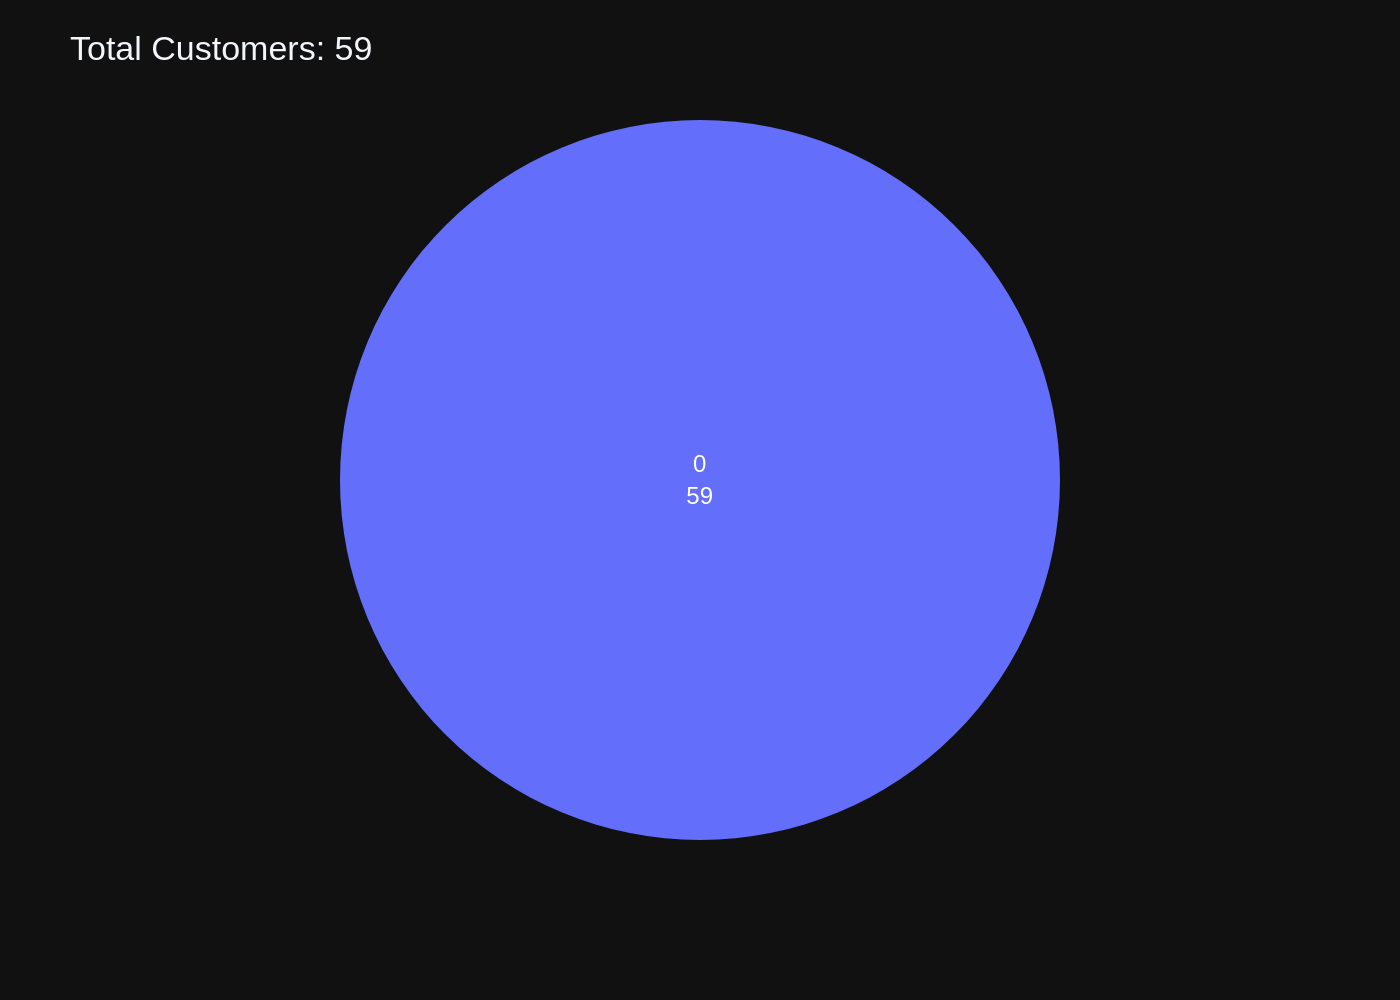

elapsed_time = 11.685657024383545


In [14]:
ts_start = time()
question = "How many customers are there"
resp = vn.ask_adaptive(question=question)
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

### Loop over questions

In [15]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



if len(df) == 1:
    fig = go.Indicator(value=df['name'][0], title={'text': 'Table Name'})
else:
    fig = px.bar(x=df['name'], y=[1]*len(df), title='Tables in SQLite Database')

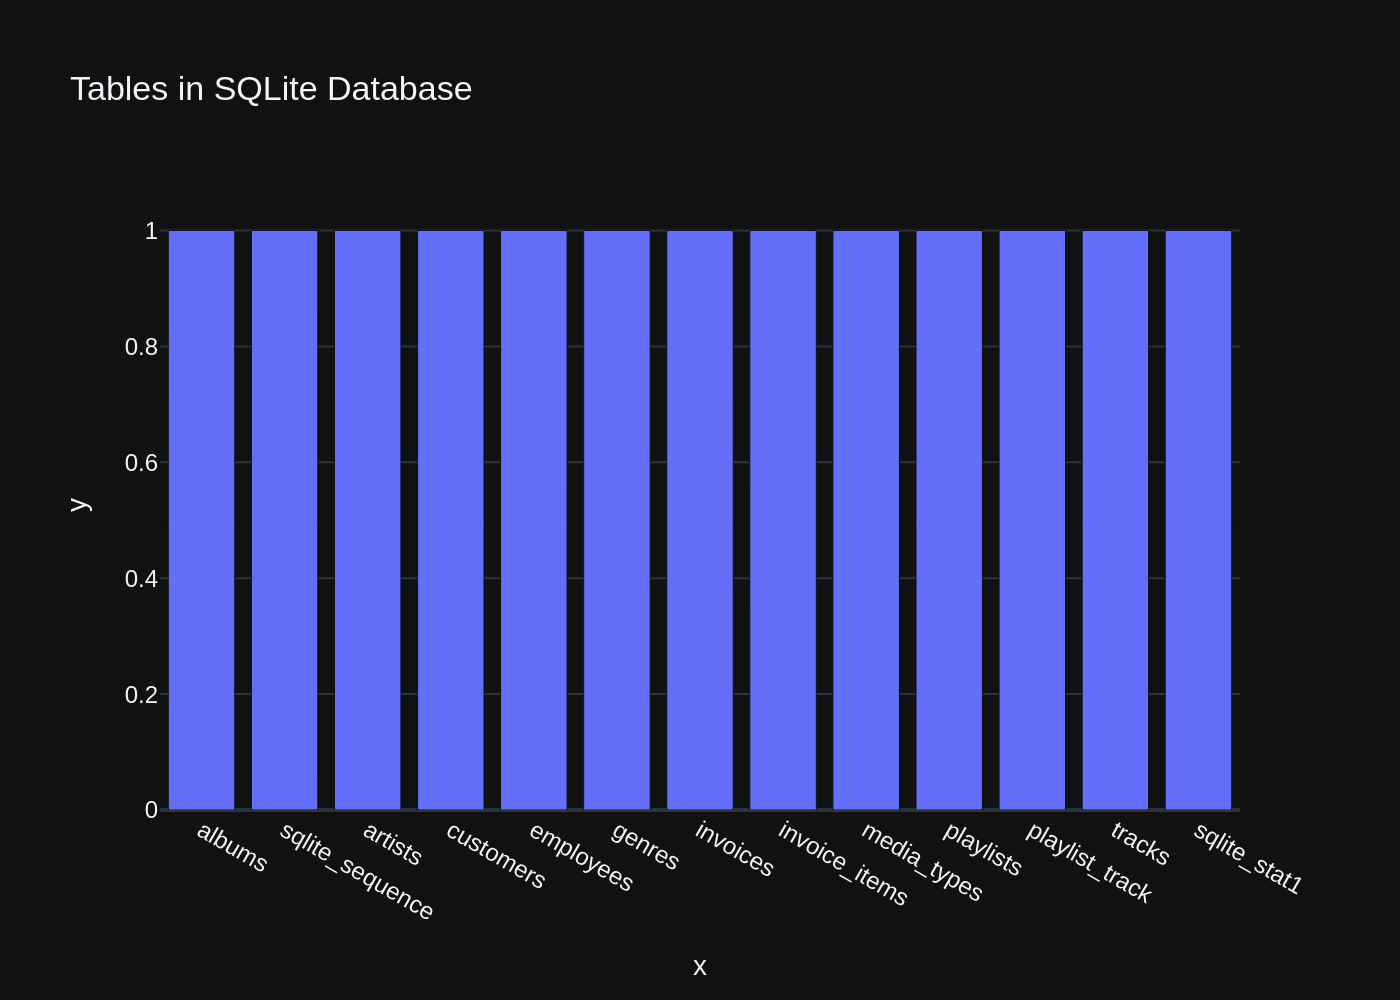





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table' AND name LIKE 'invoices%'


[( <DataFrame> )]
queried dataframe



,name
0,invoices



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



if df.shape[0] == 1:
    fig = px.indicator(df, title=df['name'][0])
else:
    fig = px.bar(df, x='name', y=range(len(df)), title='Tables Storing Customer\'s Orders')

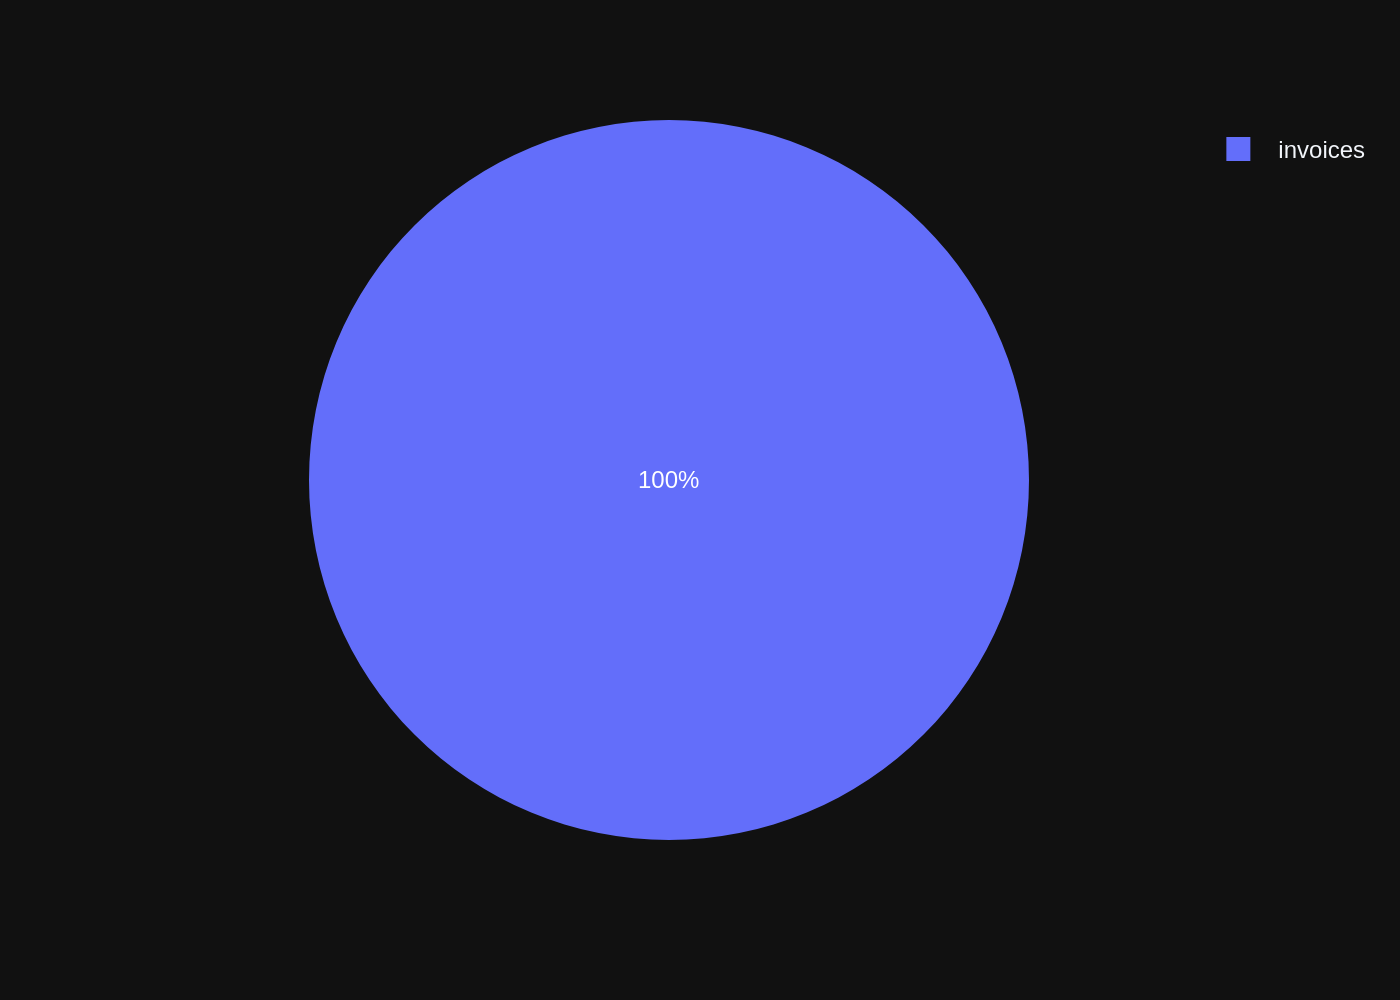





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) FROM customers


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) > 1:
    fig = px.bar(x=range(len(df)), y=df['COUNT(*)'])
    
else:
    fig = px.indicator(name='Customers', domain={'x': [0, 1], 'y': [0, 1]}, value=0 if df.empty else df.iloc[0]['COUNT(*)'], title='Number of Customers')

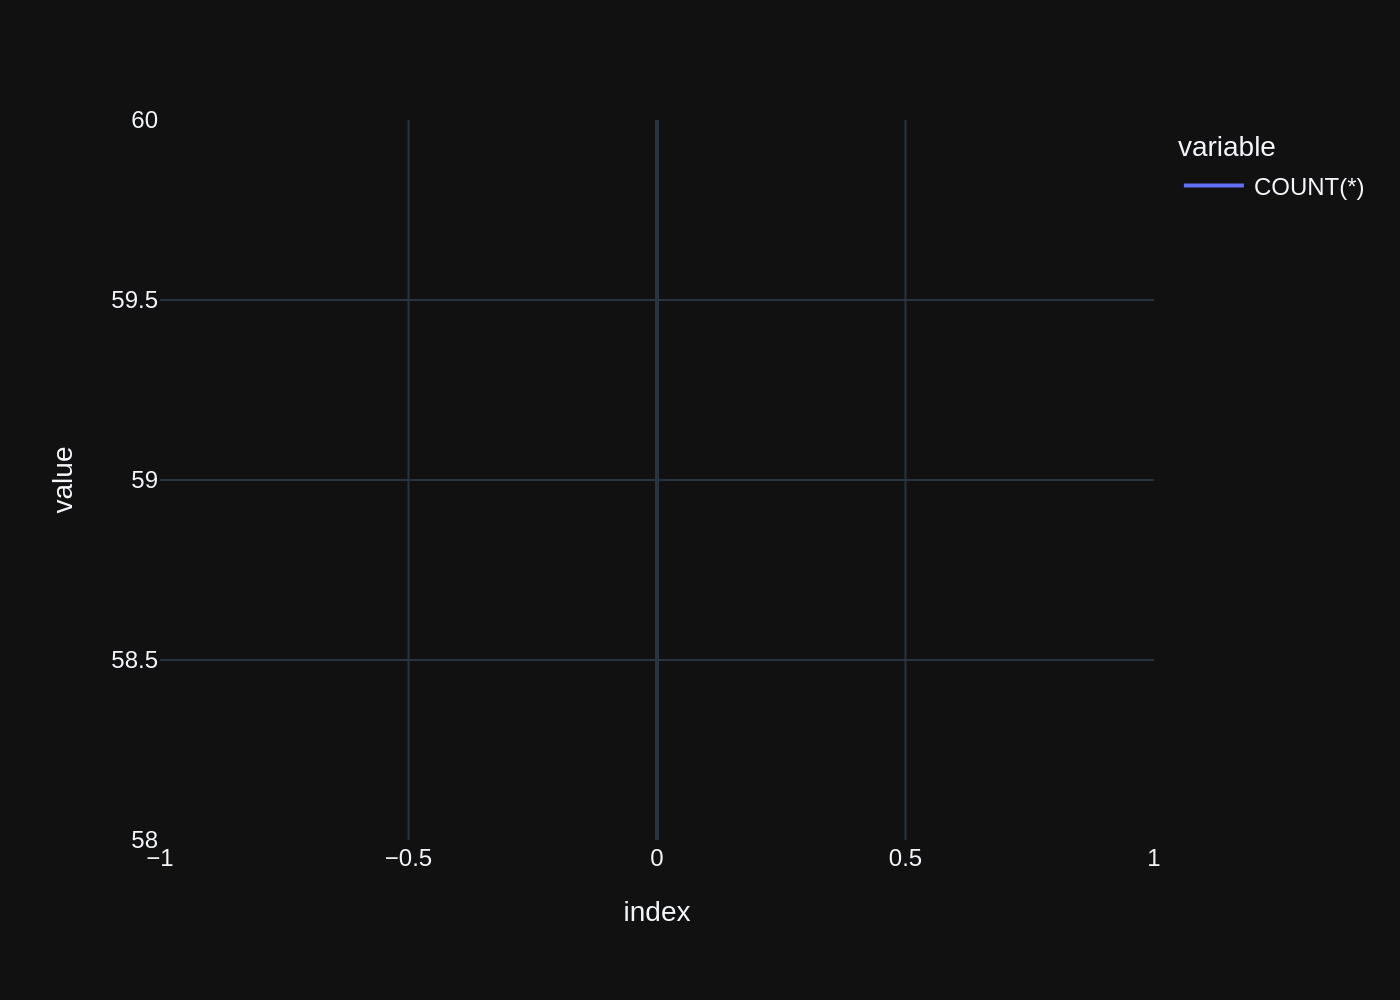





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Country, COUNT(*) AS NumCustomers
FROM customers
GROUP BY Country
ORDER BY NumCustomers DESC
LIMIT 5


[( <DataFrame> )]
queried dataframe



,Country,NumCustomers
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='Country', y='NumCustomers', title='Top 5 Countries by Number of Customers')

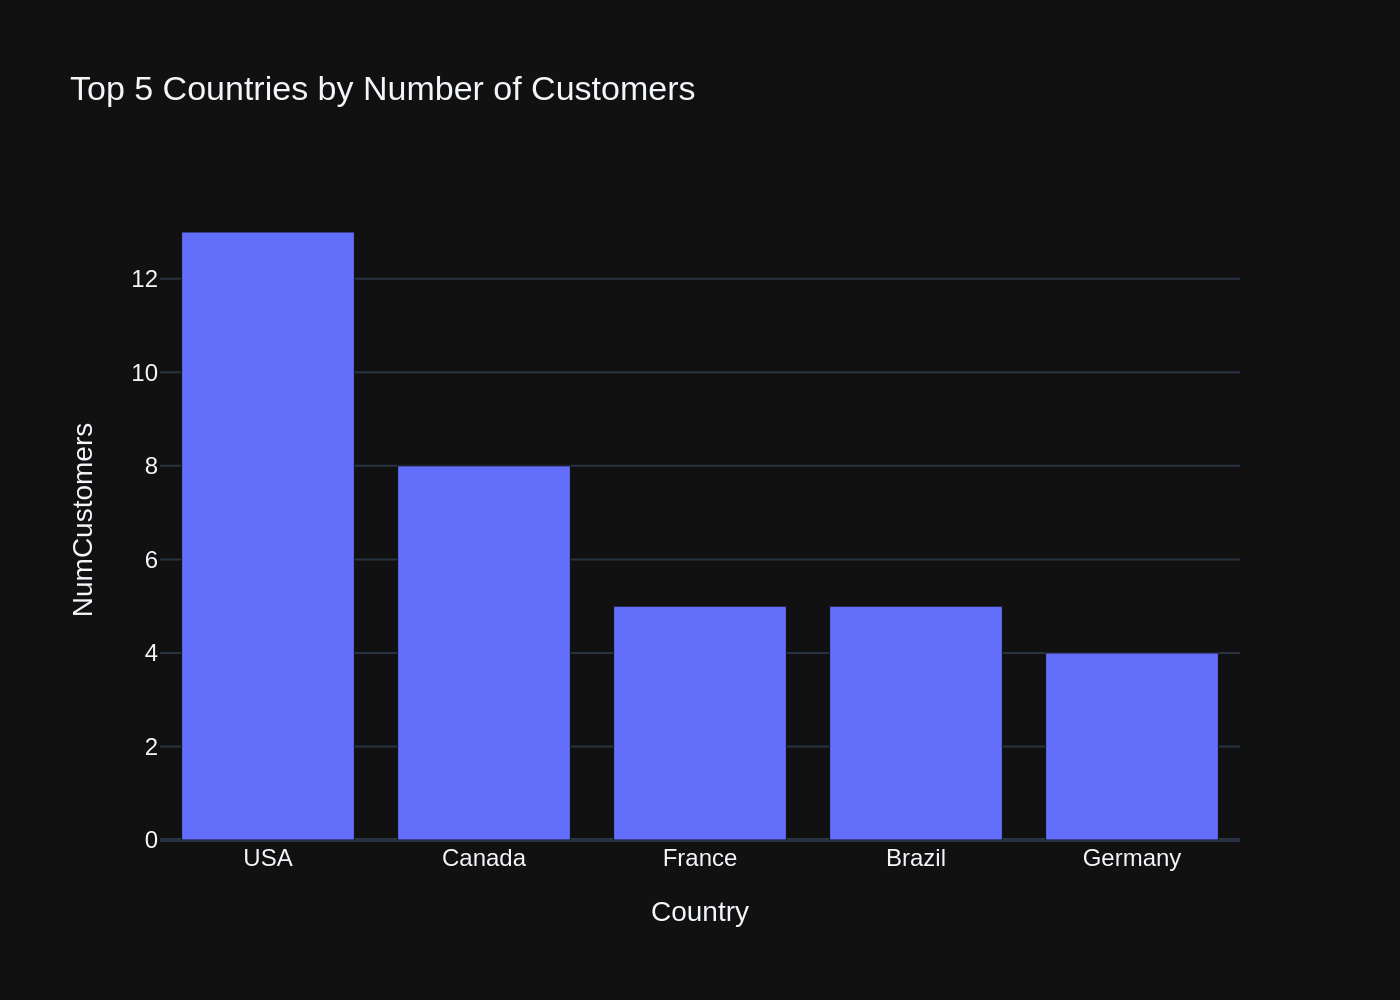





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT a.Title AS AlbumTitle, ar.Name AS ArtistName FROM albums a JOIN artists ar ON a.ArtistId = ar.ArtistId LIMIT 20


[( <DataFrame> )]
queried dataframe



,AlbumTitle,ArtistName
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
5,Jagged Little Pill,Alanis Morissette
6,Facelift,Alice In Chains
7,Warner 25 Anos,Antônio Carlos Jobim
8,Plays Metallica By Four Cellos,Apocalyptica
9,Audioslave,Audioslave



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='AlbumTitle', y='ArtistName')

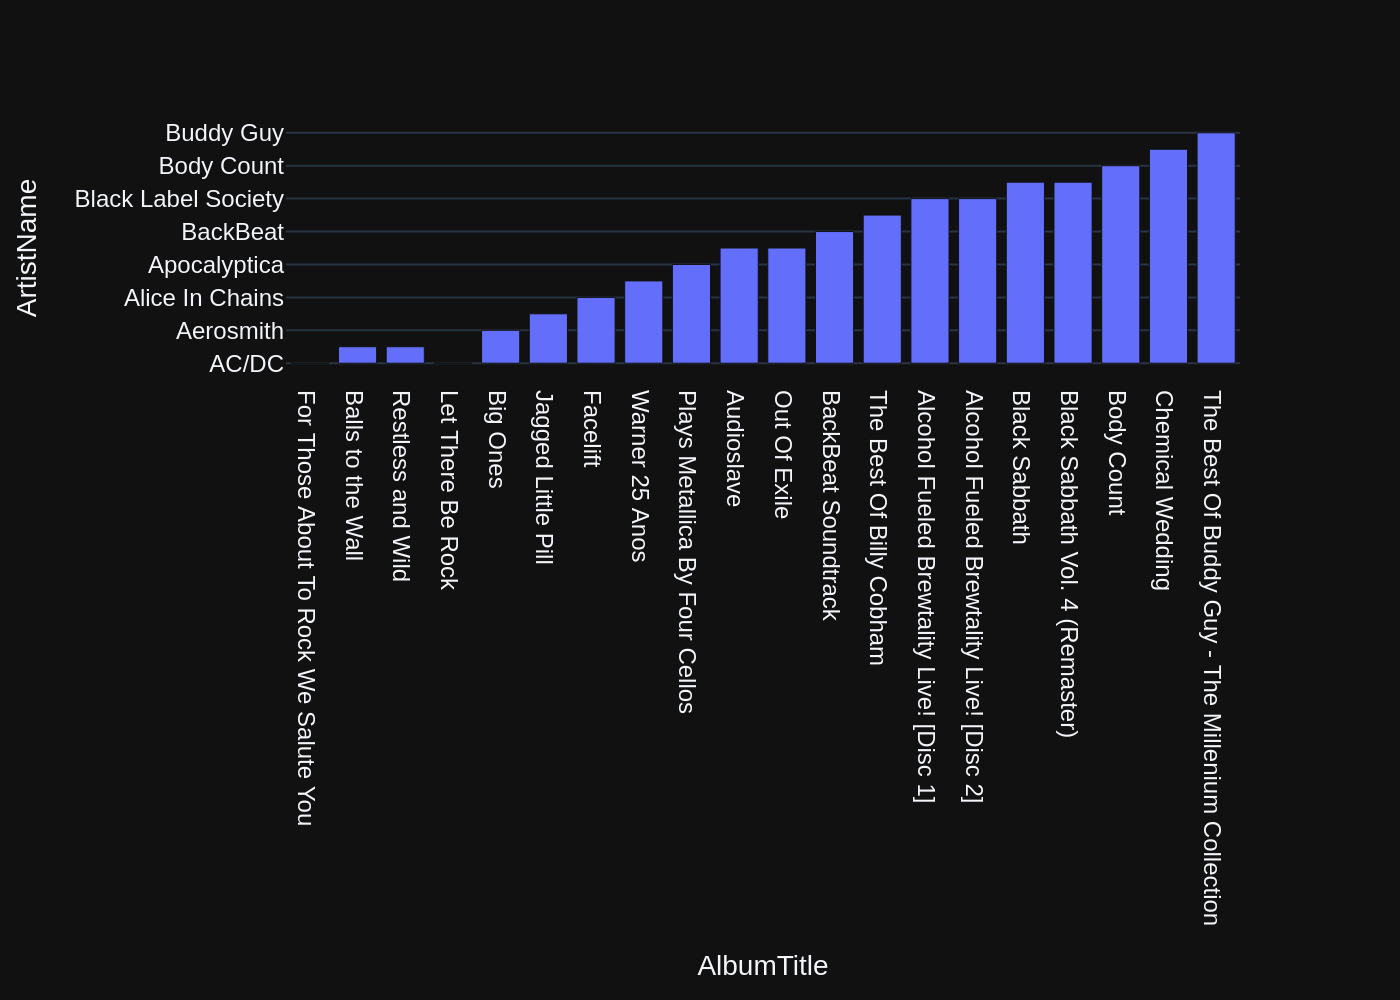





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM tracks WHERE lower(Name) LIKE '%what%'


[( <DataFrame> )]
queried dataframe



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,26,What It Takes,5,1,1,"Steven Tyler, Joe Perry, Desmond Child",310622,10144730,0.99
1,88,What You Are,10,1,1,Audioslave/Chris Cornell,249391,5988186,0.99
2,130,Do what cha wanna,13,1,2,George Duke,274155,9018565,0.99
3,342,What is and Should Never Be,30,1,1,Jimmy Page/Robert Plant,260675,8497116,0.99
4,607,So What,48,1,2,Miles Davis,564009,18360449,0.99
5,960,What A Day,76,1,1,"Mike Bordin, Billy Gould, Mike Patton",158275,5203430,0.99
6,1000,What If I Do?,80,1,1,"Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...",302994,9929799,0.99
7,1039,What Now My Love,83,1,12,carl sigman/gilbert becaud/pierre leroyer,149995,4913383,0.99
8,1145,Whatsername,89,1,4,Green Day,252316,8244843,0.99
9,1440,"Whatever It Is, I Just Can't Stop",116,1,1,"Jay Kay/Kay, Jay",247222,8249453,0.99



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



if len(df) > 1:
    fig = px.scatter(df, x='TrackId', y='UnitPrice')
    
else:
    fig = go.Figure(go.Indicator(
        mode='gauge+number',
        value=len(df),
        title={'text': 'Number of Tracks'},
        gauge={
            'axis': {'visible': False},
            'bgcolor': "white",
            'steps': [
                {'range': [0, 1], 'color': "#629BFF"},
                {'range': [1, len(df)], 'color': "#FF7F5C"}
            ]
        }
    ))

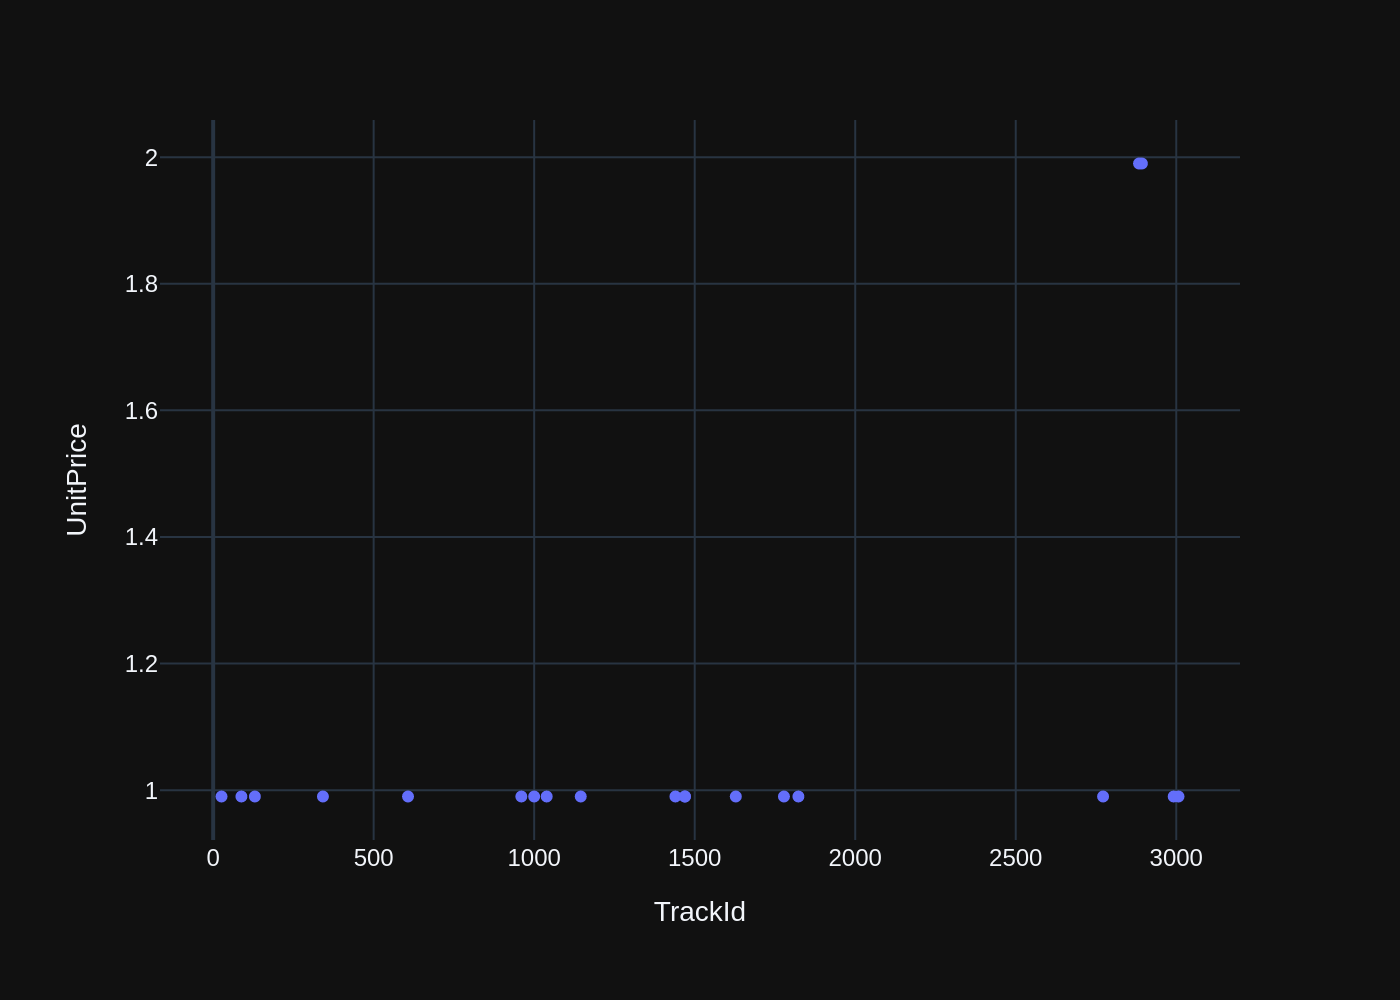





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, COUNT(InvoiceId) AS TotalInvoices FROM invoices GROUP BY CustomerId


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalInvoices
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.indicator(df, title='Total Invoices', value=df['TotalInvoices'][0])
else:
    fig = px.bar(df, x='CustomerId', y='TotalInvoices', title='Total Invoices by Customer')

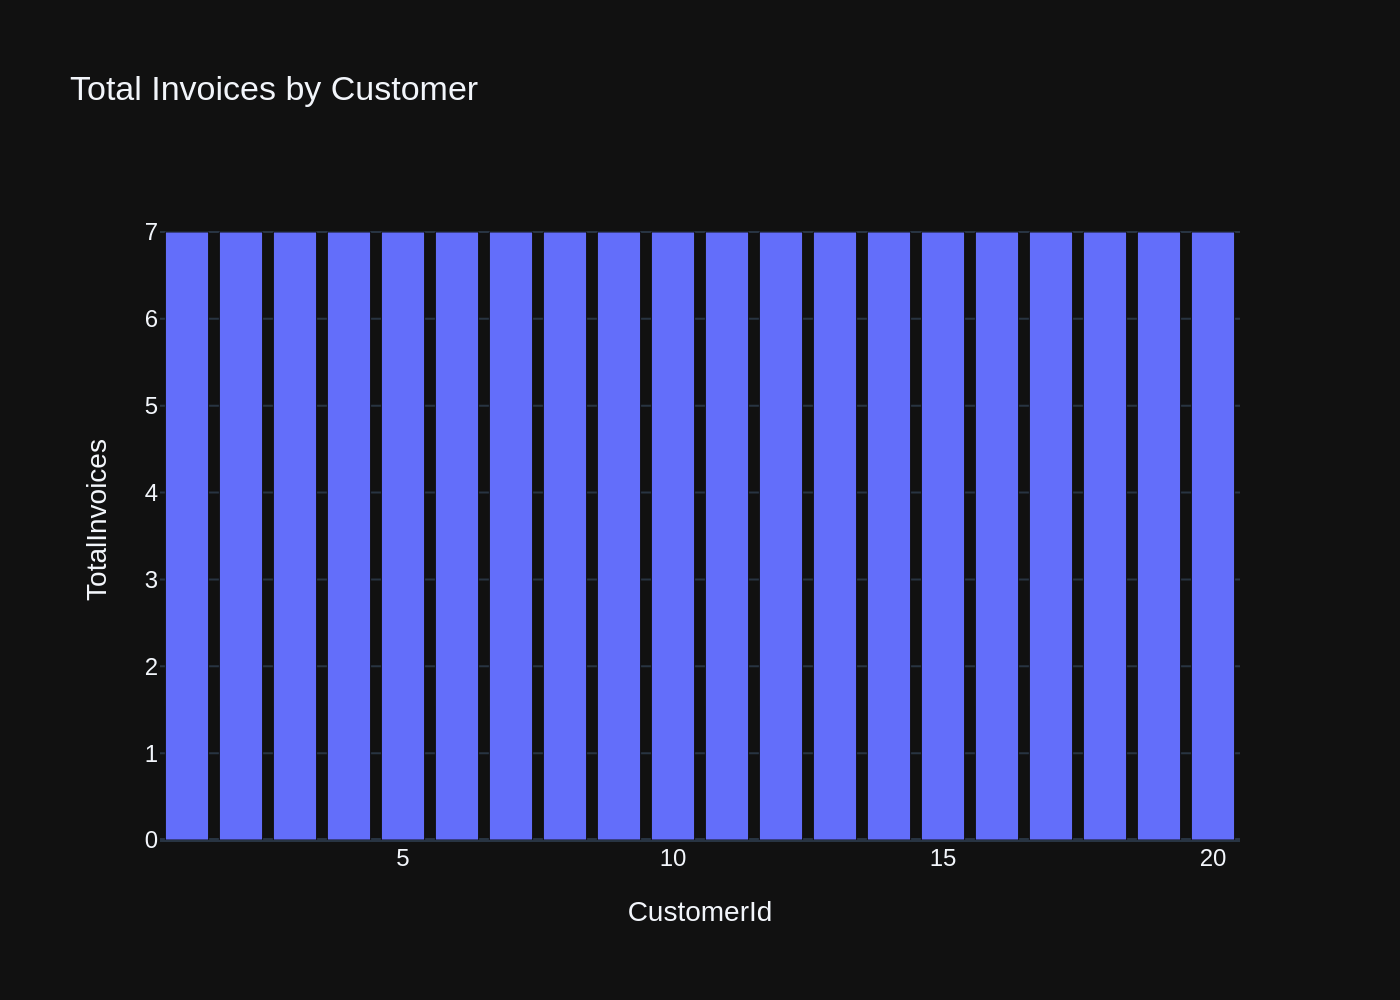





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.Country, COUNT(i.InvoiceId) AS TotalInvoices FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId GROUP BY c.Country LIMIT 20


[( <DataFrame> )]
queried dataframe



,Country,TotalInvoices
0,Argentina,7
1,Australia,7
2,Austria,7
3,Belgium,7
4,Brazil,35
5,Canada,56
6,Chile,7
7,Czech Republic,14
8,Denmark,7
9,Finland,7



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



fig = px.bar(df, x="Country", y="TotalInvoices")

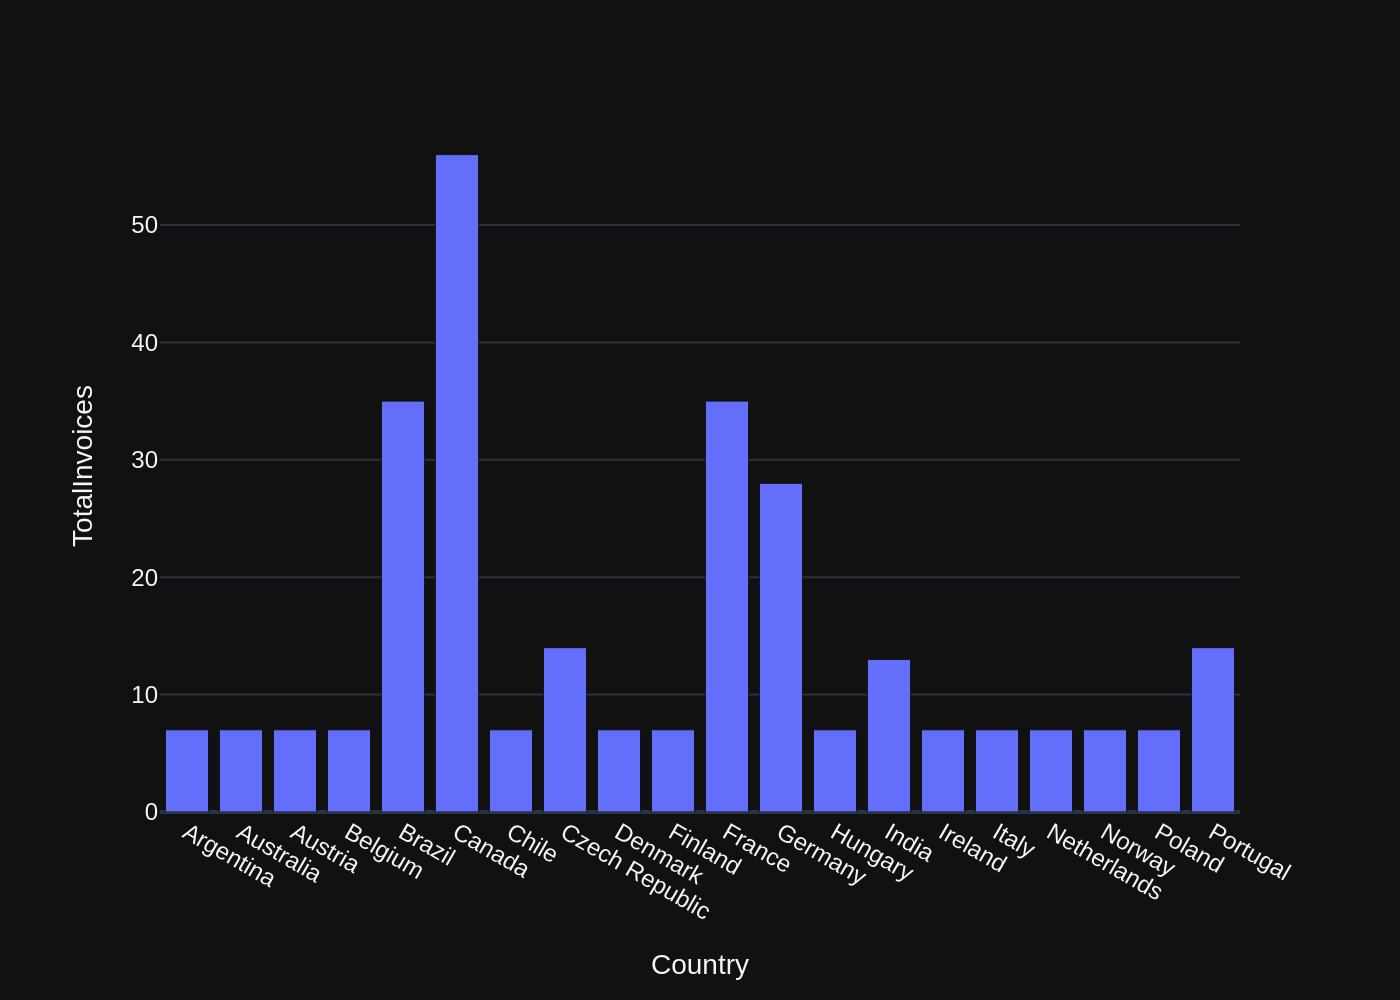





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM invoices WHERE Total > 10


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
5,40,36,2009-06-15 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,13.86
6,47,15,2009-07-16 00:00:00,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,13.86
7,54,53,2009-08-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,13.86
8,61,32,2009-09-16 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,13.86
9,68,11,2009-10-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,13.86



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='InvoiceDate', y='Total')

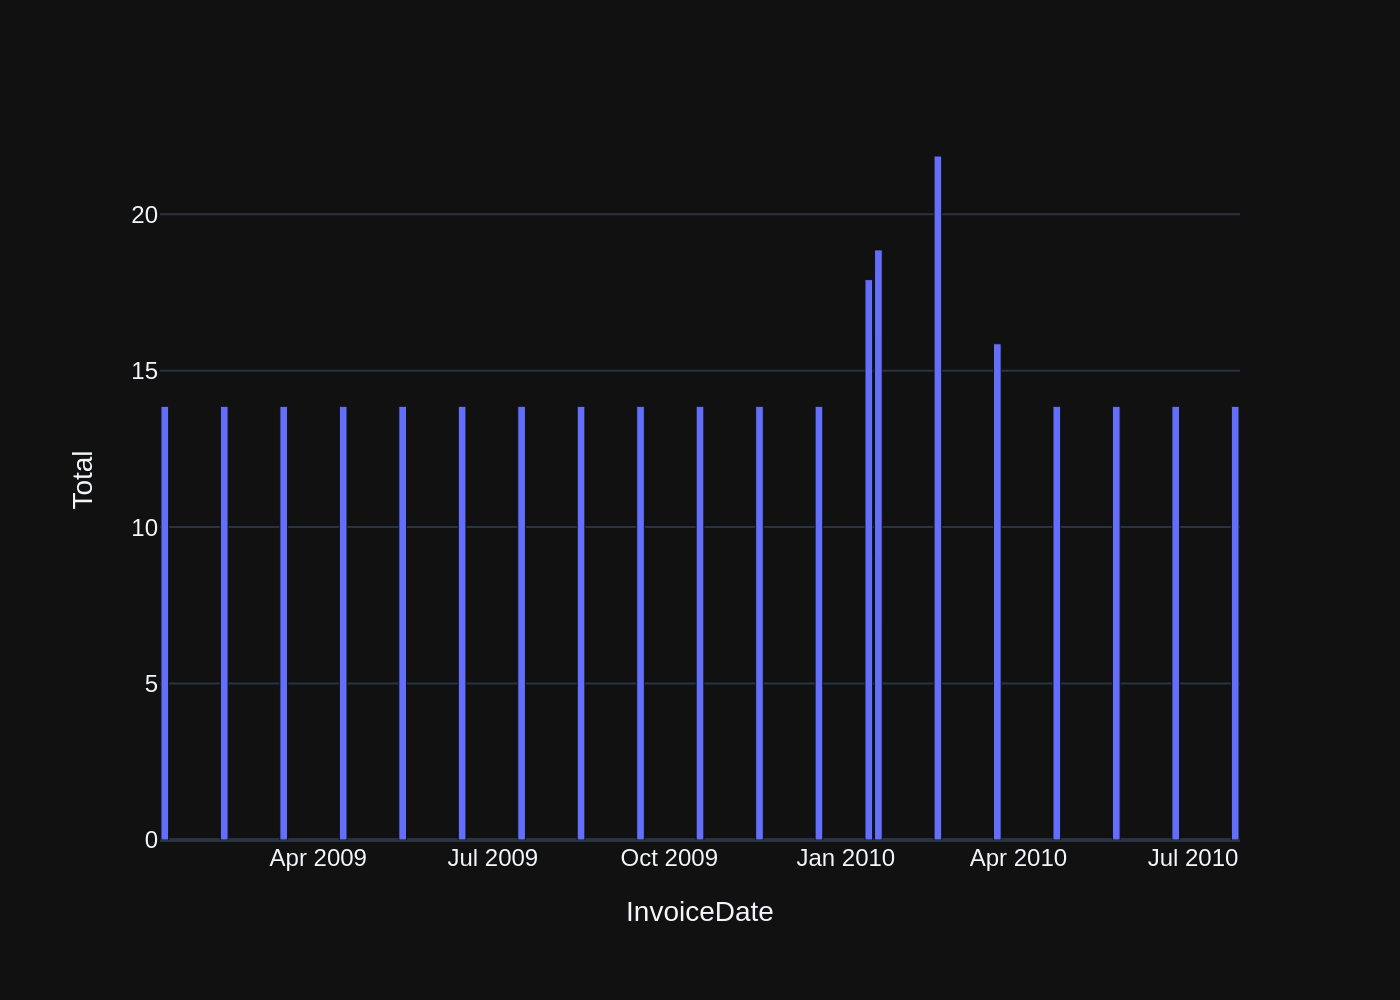





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT InvoiceId, Total FROM invoices WHERE InvoiceDate >= '2010-01-01'


[( <DataFrame> )]
queried dataframe



,InvoiceId,Total
0,84,1.98
1,85,1.98
2,86,3.96
3,87,6.94
4,88,17.91
5,89,18.86
6,90,0.99
7,91,1.98
8,92,1.98
9,93,3.96



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
if len(df) > 1:
    fig = px.bar(df, x='InvoiceId', y='Total')
    
else:
    fig = px.gauge(df, values=df['Total'][0])

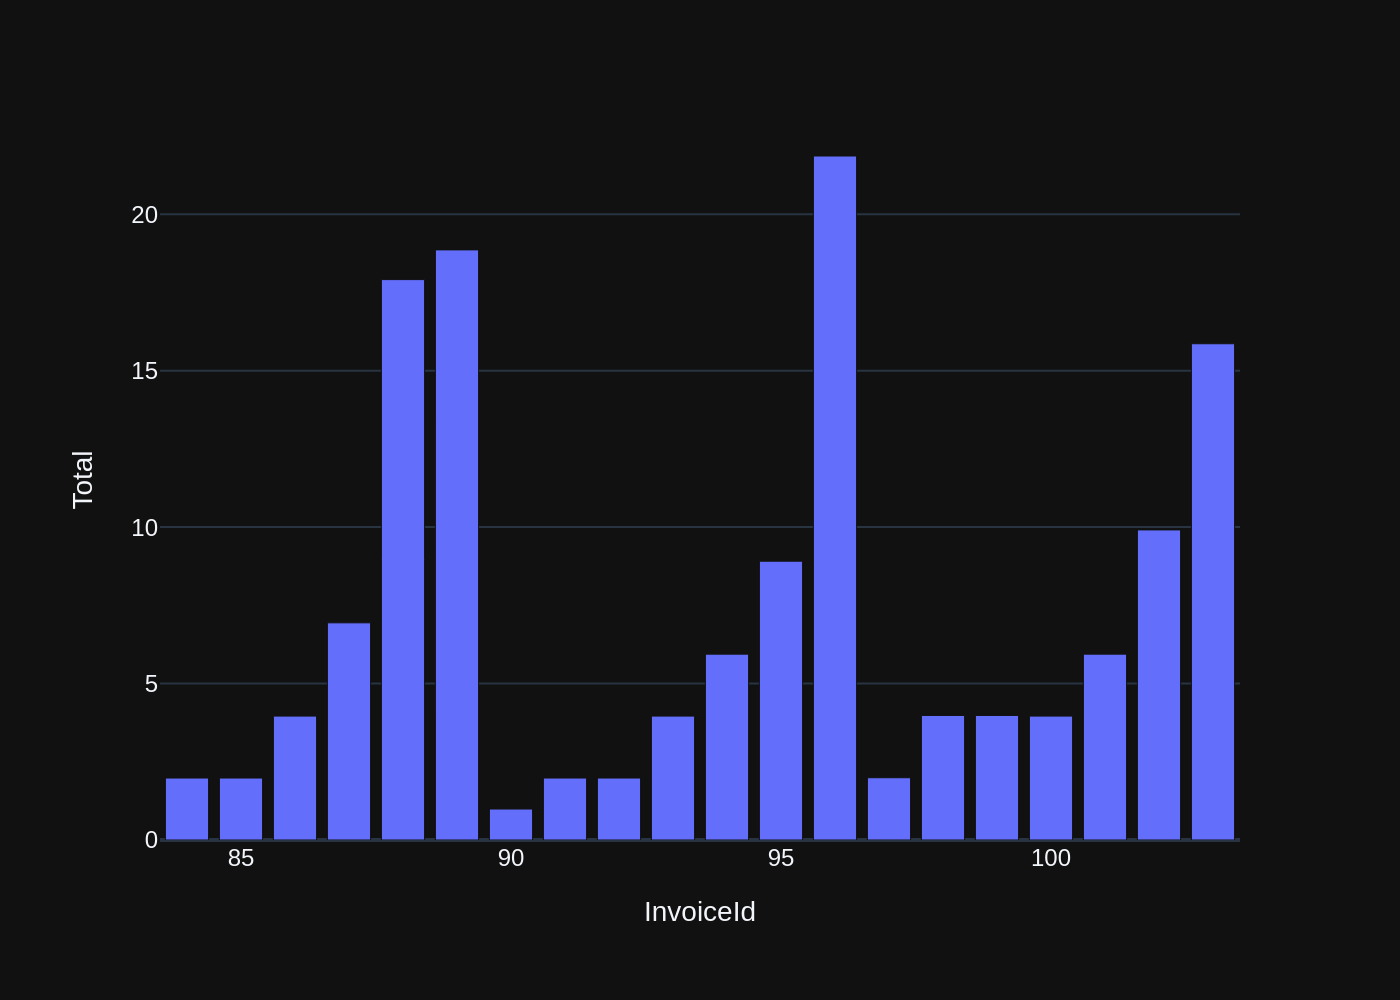





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT
    e.FirstName || ' ' || e.LastName AS Employee,
    COALESCE(m.FirstName || ' ' || m.LastName, 'None') AS Manager
FROM
    employees e
LEFT JOIN
    employees m ON e.ReportsTo = m.EmployeeId


[( <DataFrame> )]
queried dataframe



,Employee,Manager
0,Andrew Adams,None
1,Nancy Edwards,Andrew Adams
2,Jane Peacock,Nancy Edwards
3,Margaret Park,Nancy Edwards
4,Steve Johnson,Nancy Edwards
5,Michael Mitchell,Andrew Adams
6,Robert King,Michael Mitchell
7,Laura Callahan,Michael Mitchell



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



if len(df) == 1:
    fig = px.indicator(title=df['Employee'][0], value=df['Manager'][0])
else:
    fig = px.bar(df, x="Employee", y="Manager")

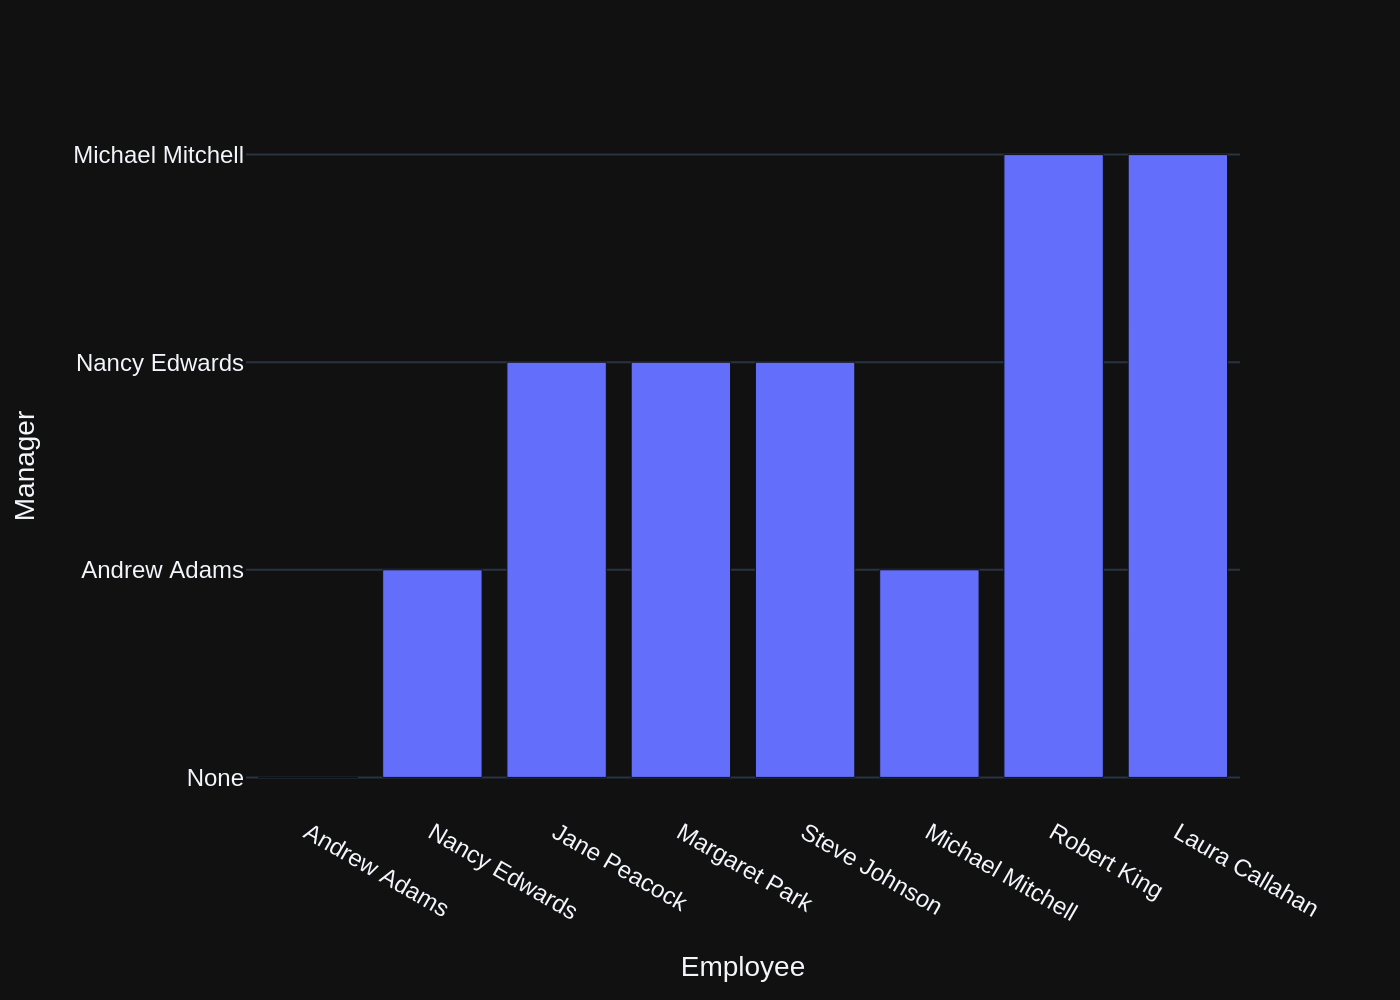





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT
    CustomerId,
    AVG(Total) AS AvgInvoiceTotal
FROM
    invoices
GROUP BY
    CustomerId


[( <DataFrame> )]
queried dataframe



,CustomerId,AvgInvoiceTotal
0,1,5.660000
1,2,5.374286
2,3,5.660000
3,4,5.660000
4,5,5.802857
5,6,7.088571
6,7,6.088571
7,8,5.374286
8,9,5.374286
9,10,5.374286



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



fig = px.bar(df, x='CustomerId', y='AvgInvoiceTotal')

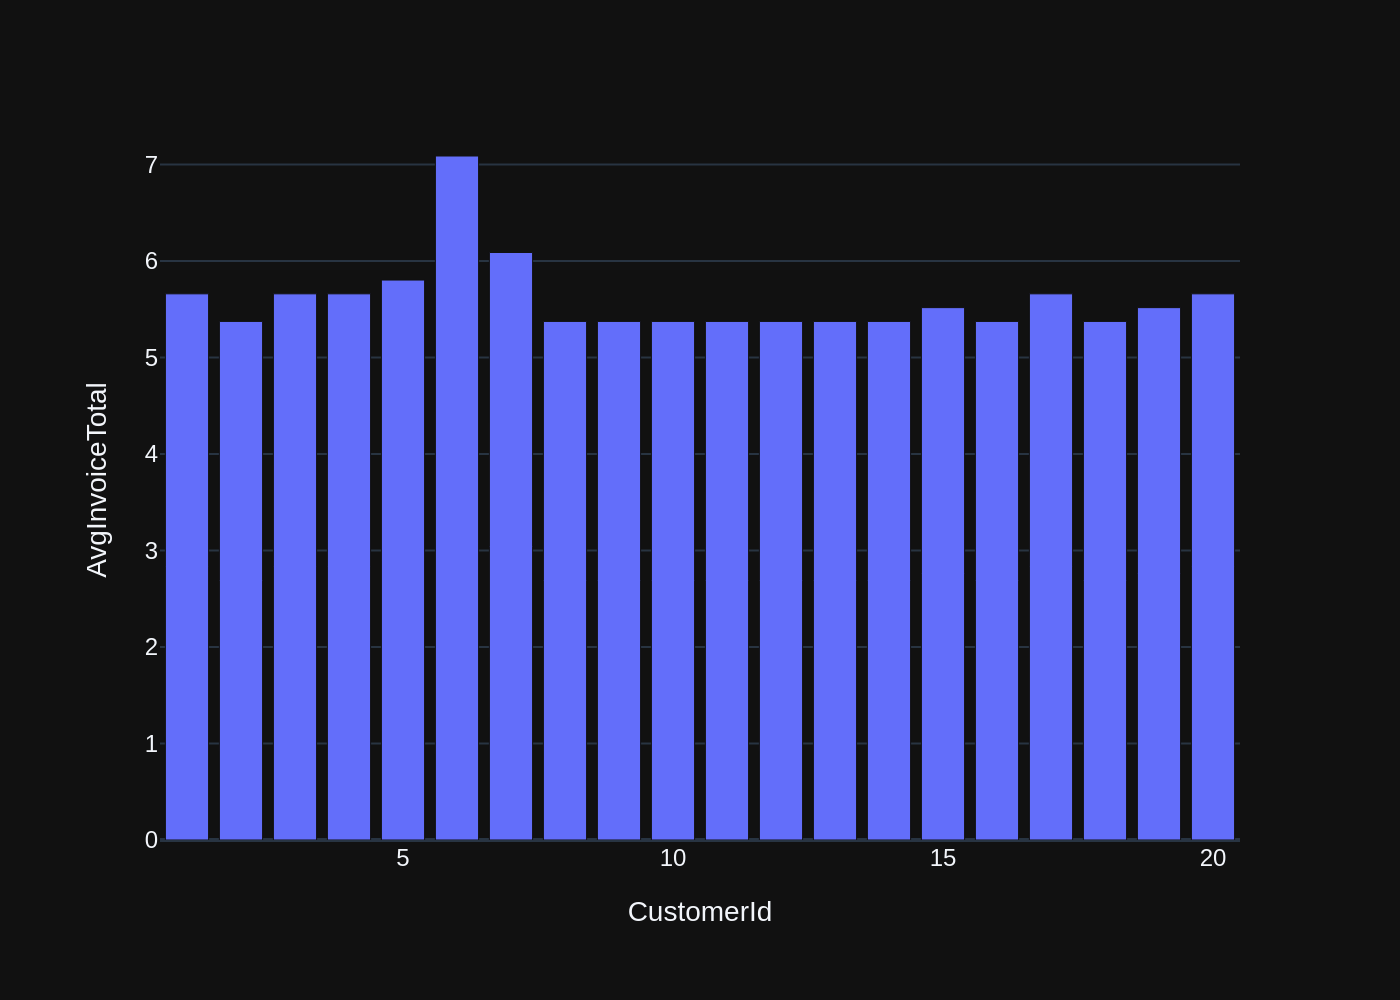





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT TrackId, Name, UnitPrice FROM tracks ORDER BY UnitPrice DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,TrackId,Name,UnitPrice
0,2819,Battlestar Galactica: The Story So Far,1.99
1,2820,Occupation / Precipice,1.99
2,2821,"Exodus, Pt. 1",1.99
3,2822,"Exodus, Pt. 2",1.99
4,2823,Collaborators,1.99



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='TrackId', y='UnitPrice')

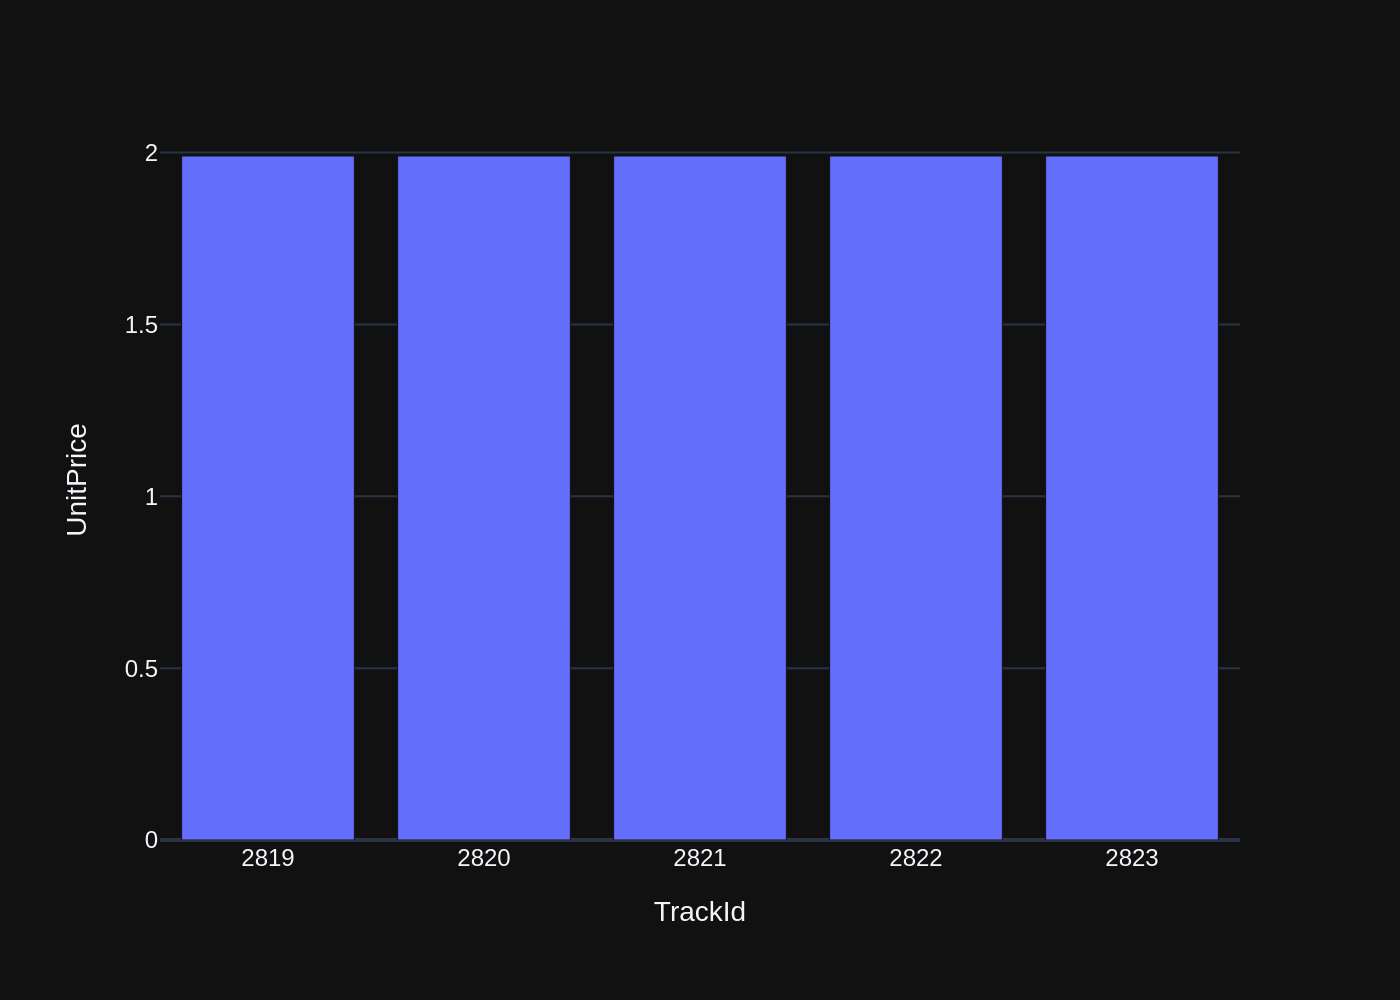





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT g.Name AS GenreName, COUNT(t.TrackId) AS NumTracks FROM genres g JOIN tracks t ON g.GenreId = t.GenreId GROUP BY g.GenreId LIMIT 20


[( <DataFrame> )]
queried dataframe



,GenreName,NumTracks
0,Rock,1297
1,Jazz,130
2,Metal,374
3,Alternative & Punk,332
4,Rock And Roll,12
5,Blues,81
6,Latin,579
7,Reggae,58
8,Pop,48
9,Soundtrack,43



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if df.shape[0] == 1:
    fig = px.indicator(df, title='Tracks per Genre', location='center')
else:
    fig = px.bar(df, x='GenreName', y='NumTracks', title='Tracks per Genre')

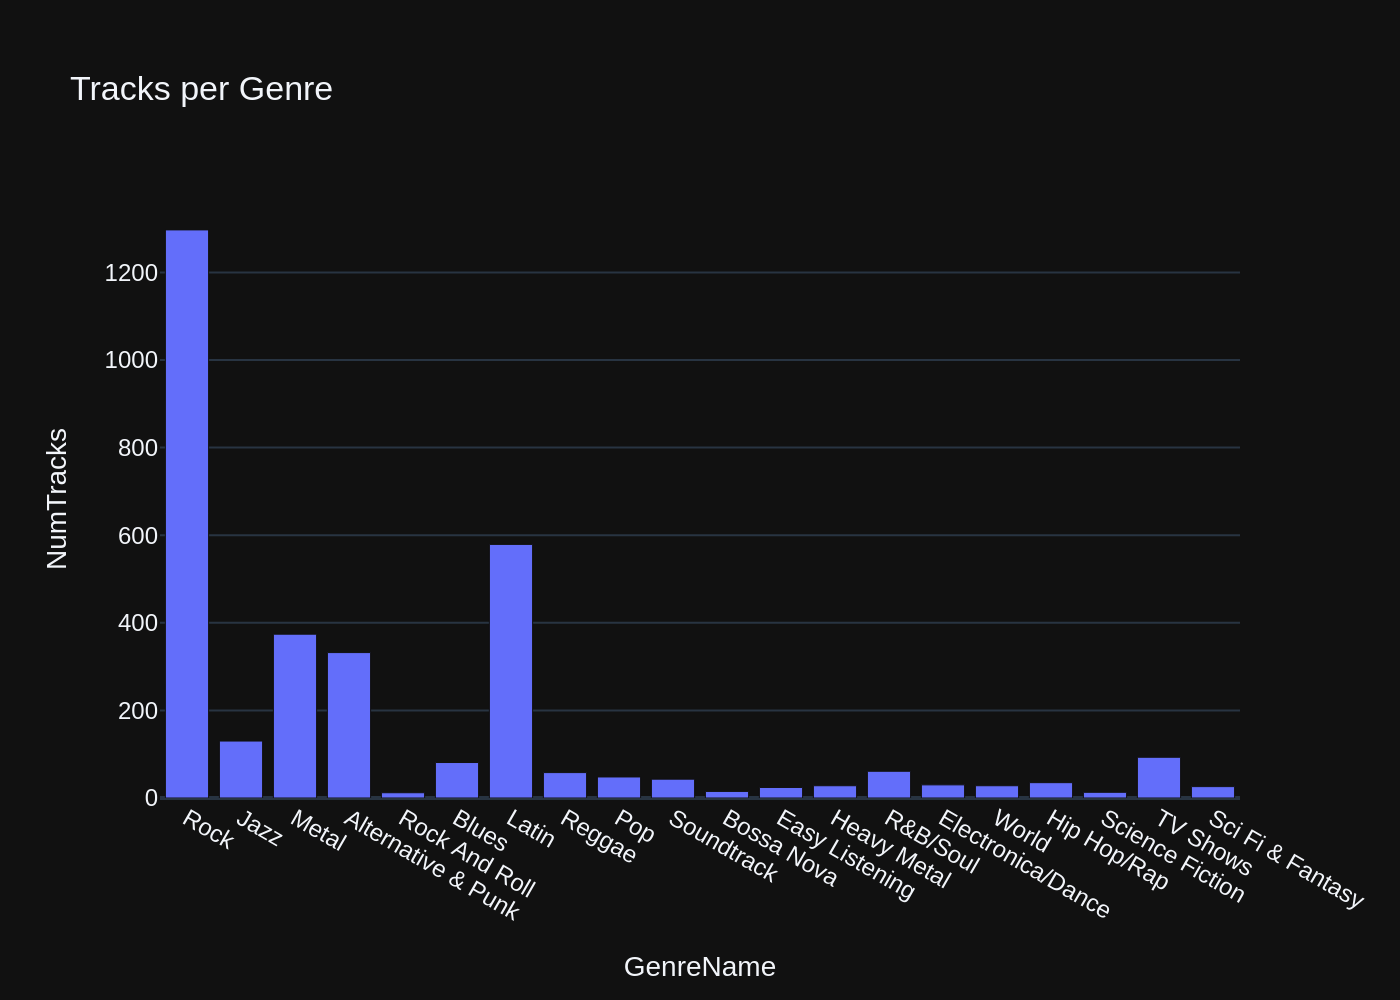





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT g.GenreId, g.Name FROM genres g LEFT JOIN tracks t ON g.GenreId = t.GenreId WHERE t.TrackId IS NULL


[( <DataFrame> )]
queried dataframe



,GenreId,Name



[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 3 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None





# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT * FROM customers WHERE CustomerId NOT IN (SELECT DISTINCT CustomerId FROM invoices)


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 3 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName || ' ' || c.LastName AS CustomerName FROM customers c LEFT JOIN invoices i ON c.CustomerId = i.CustomerId WHERE i.InvoiceId IS NULL


[( <DataFrame> )]
queried dataframe



,CustomerId,CustomerName






# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT ar.ArtistId, ar.Name, COUNT(t.TrackId) AS TrackCount FROM artists ar JOIN albums a ON ar.ArtistId = a.ArtistId JOIN tracks t ON a.AlbumId = t.AlbumId GROUP BY ar.ArtistId ORDER BY TrackCount DESC LIMIT 10


[( <DataFrame> )]
queried dataframe



,ArtistId,Name,TrackCount
0,90,Iron Maiden,213
1,150,U2,135
2,22,Led Zeppelin,114
3,50,Metallica,112
4,58,Deep Purple,92
5,149,Lost,92
6,118,Pearl Jam,67
7,100,Lenny Kravitz,57
8,21,Various Artists,56
9,156,The Office,53



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='Name', y='TrackCount', title='Top 10 Most Popular Artists')

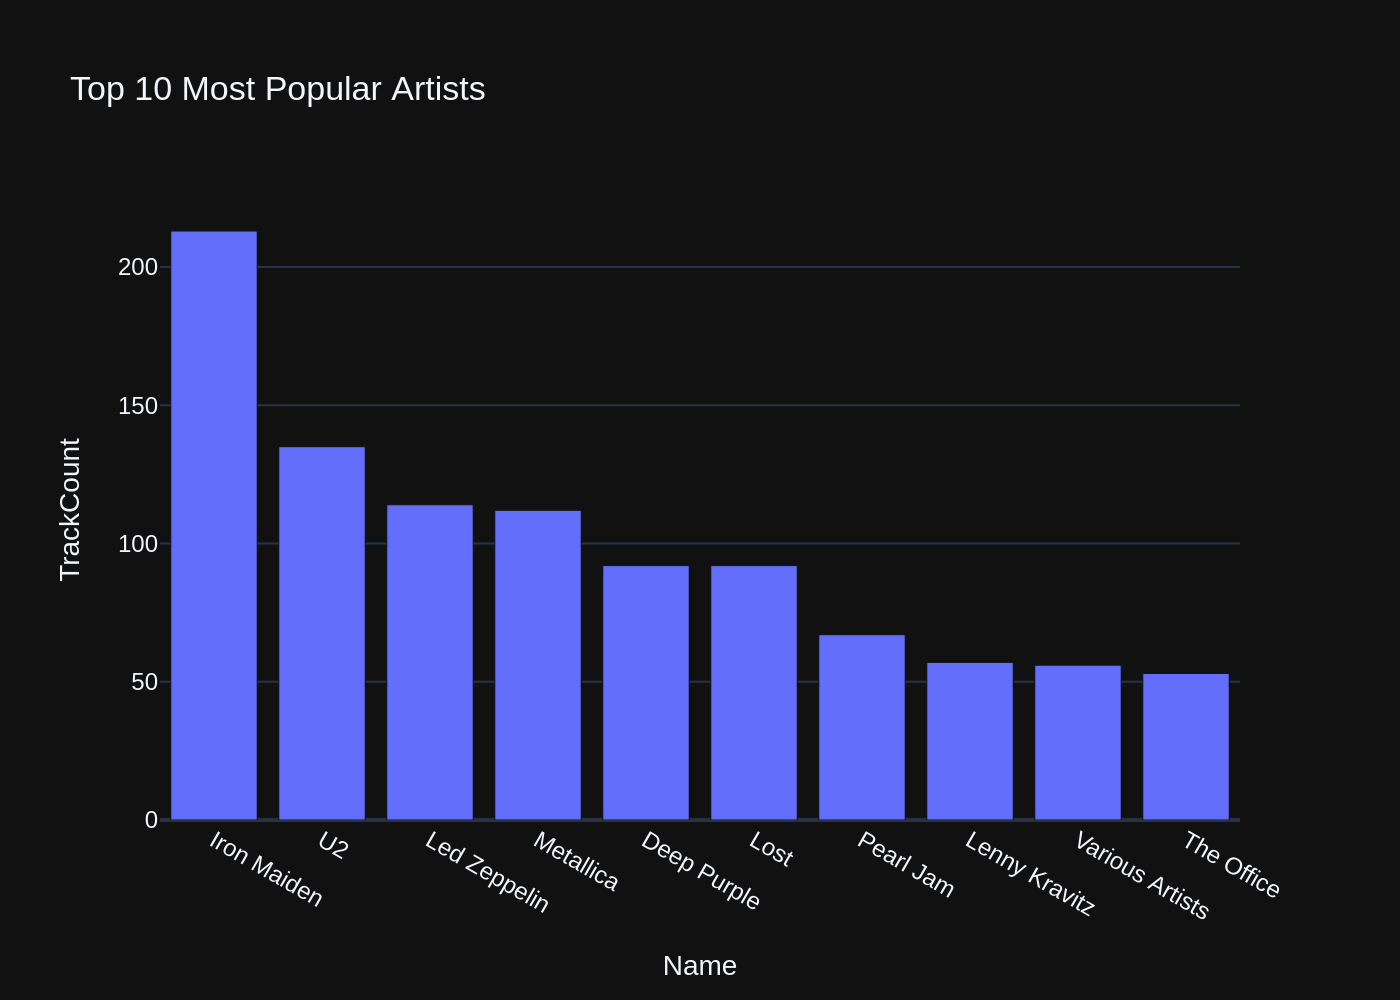





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName || ' ' || LastName AS FullName, Email FROM customers WHERE Country = 'Canada' LIMIT 20


[( <DataFrame> )]
queried dataframe



,FullName,Email
0,François Tremblay,ftremblay@gmail.com
1,Mark Philips,mphilips12@shaw.ca
2,Jennifer Peterson,jenniferp@rogers.ca
3,Robert Brown,robbrown@shaw.ca
4,Edward Francis,edfrancis@yachoo.ca
5,Martha Silk,marthasilk@gmail.com
6,Aaron Mitchell,aaronmitchell@yahoo.ca
7,Ellie Sullivan,ellie.sullivan@shaw.ca



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



if len(df) == 1:
    fig = go.Indicator(mode='text', text=f"{df['FullName'][0]}: {df['Email'][0]}")
else:
    fig = px.scatter(df, x='FullName', y='Email')

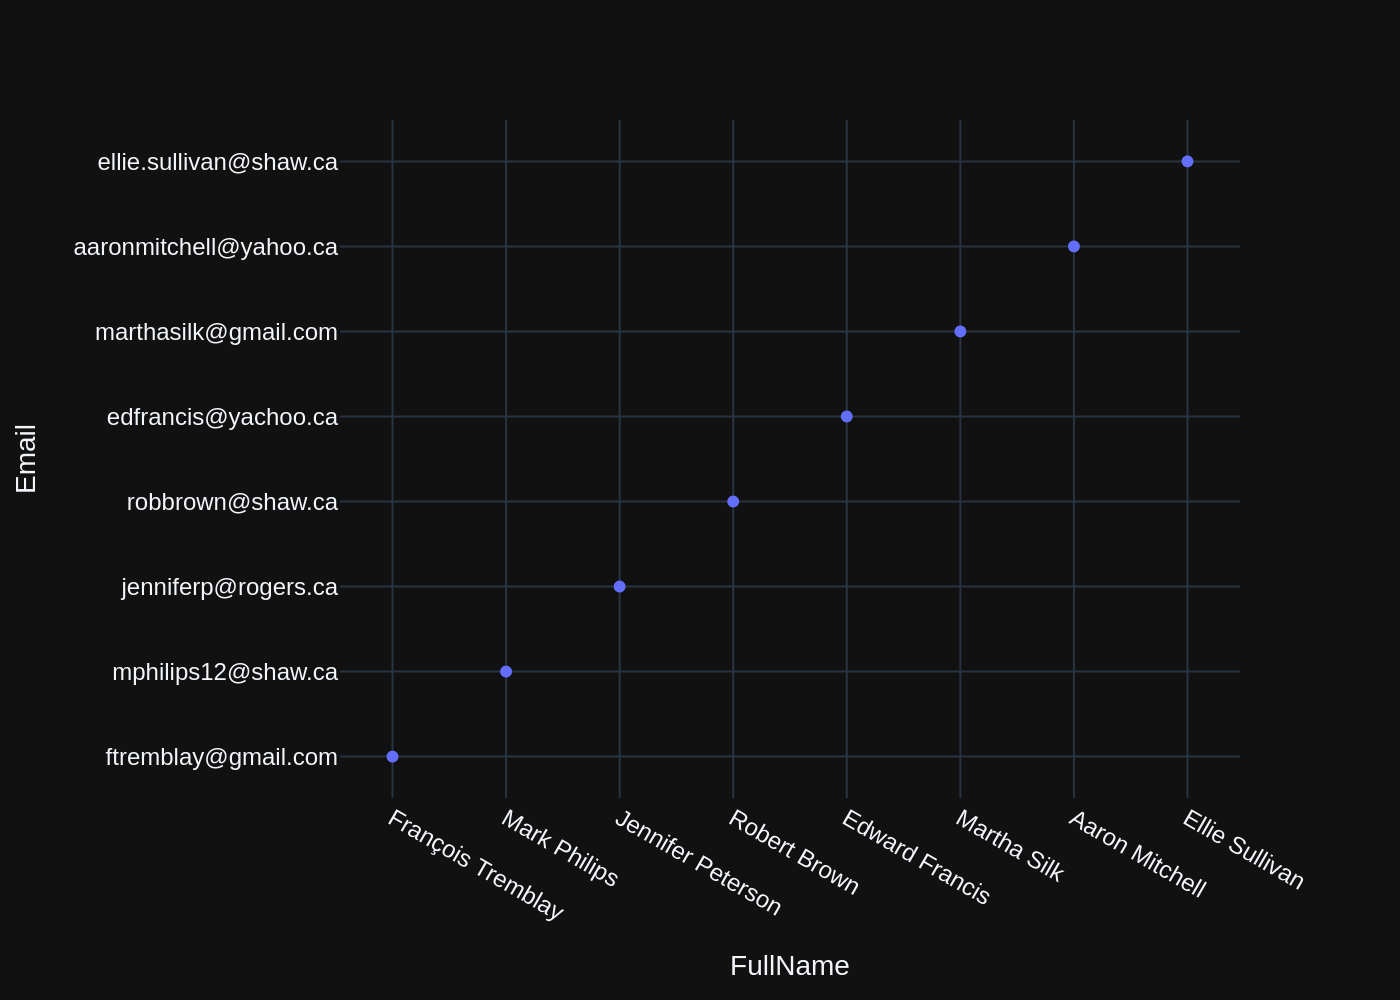





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, COUNT(*) AS InvoiceCount FROM invoices GROUP BY CustomerId ORDER BY InvoiceCount DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



,CustomerId,InvoiceCount
0,1,7



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='CustomerId', y='InvoiceCount')

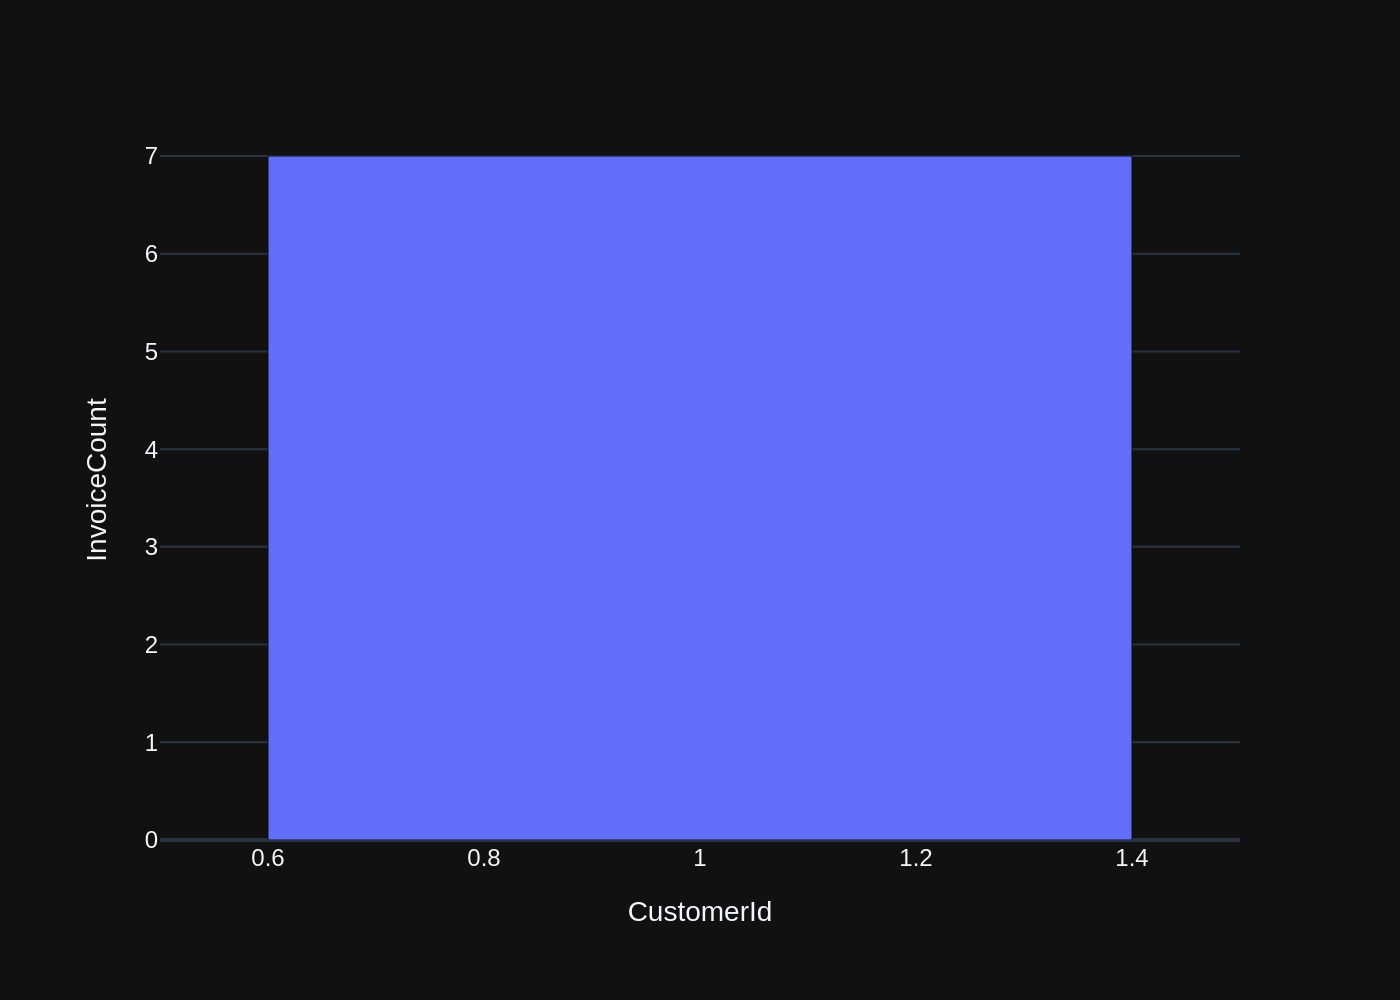





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT
    i.CustomerId,
    COUNT(ii.TrackId) AS TotalAlbumsBought
FROM
    invoices i
JOIN
    invoice_items ii ON i.InvoiceId = ii.InvoiceId
JOIN
    tracks t ON ii.TrackId = t.TrackId AND t.MediaTypeId = (SELECT MediaTypeId FROM media_types WHERE Name = 'album')
GROUP BY
    i.CustomerId
ORDER BY
    TotalAlbumsBought DESC
LIMIT 1


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalAlbumsBought



[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, c.FirstName || ' ' || c.LastName AS CustomerName, SUM(ii.Quantity) AS TotalAlbums FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId JOIN albums a ON ii.TrackId = a.AlbumId GROUP BY c.CustomerId ORDER BY TotalAlbums DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



,CustomerId,CustomerName,TotalAlbums
0,42,Wyatt Girard,18



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) > 1:
    fig = px.bar(df, x='CustomerName', y='TotalAlbums')
    
else:
    fig = px.gauge(df, 'TotalAlbums', title='Total Albums Sold')

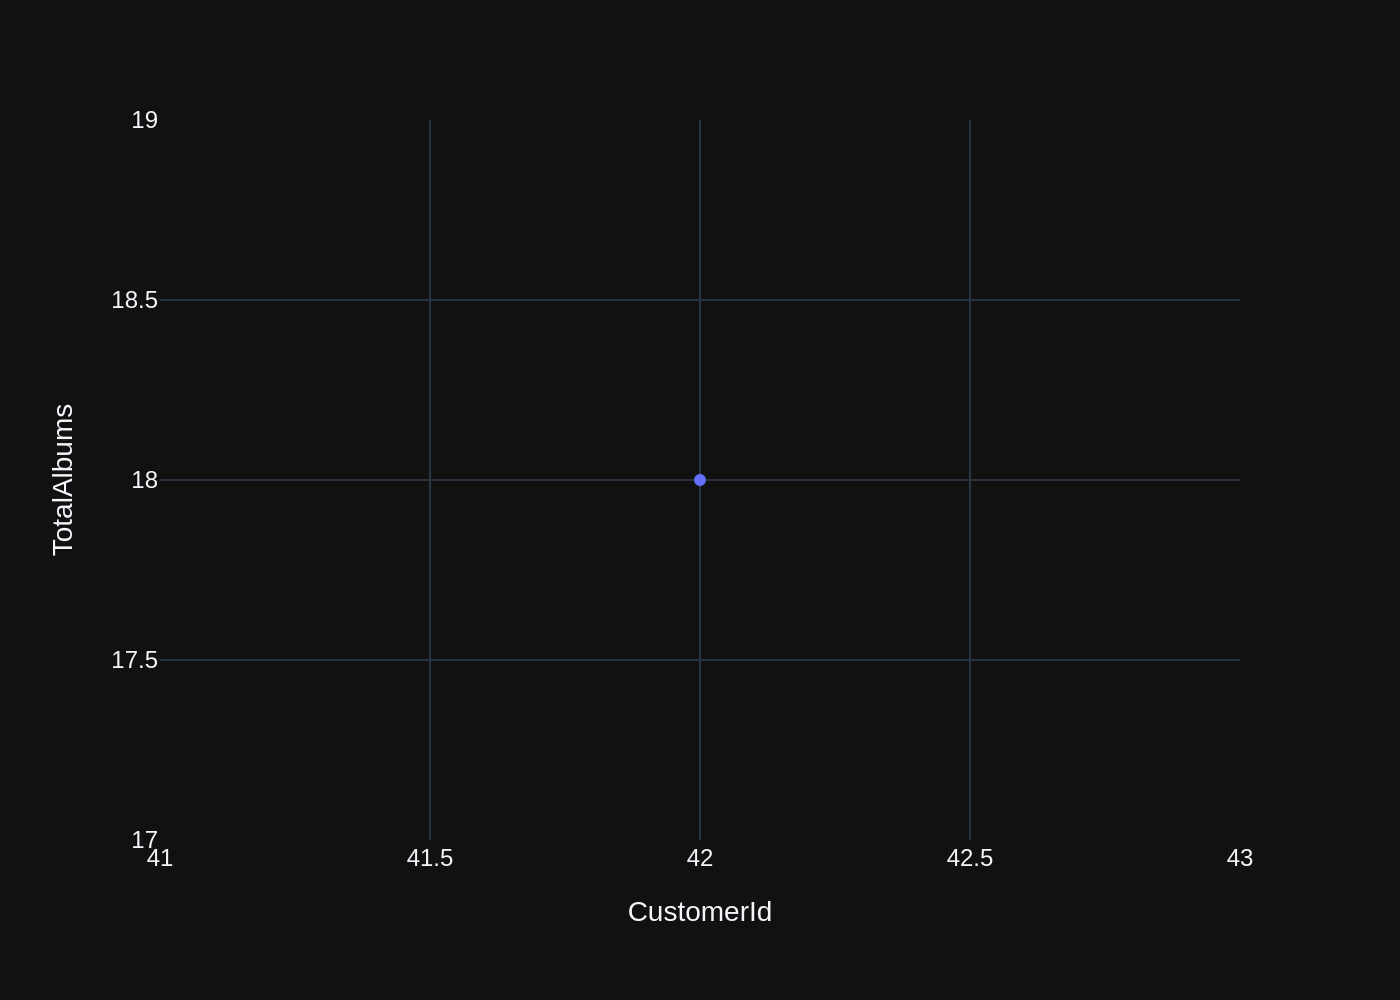


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 3 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, COUNT(ii.InvoiceLineId) AS TotalAlbums FROM customers c JOIN invoices i ON c.CustomerId = i.CustomerId JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId GROUP BY c.CustomerId ORDER BY TotalAlbums DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalAlbums
0,1,38



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='CustomerId', y='TotalAlbums')

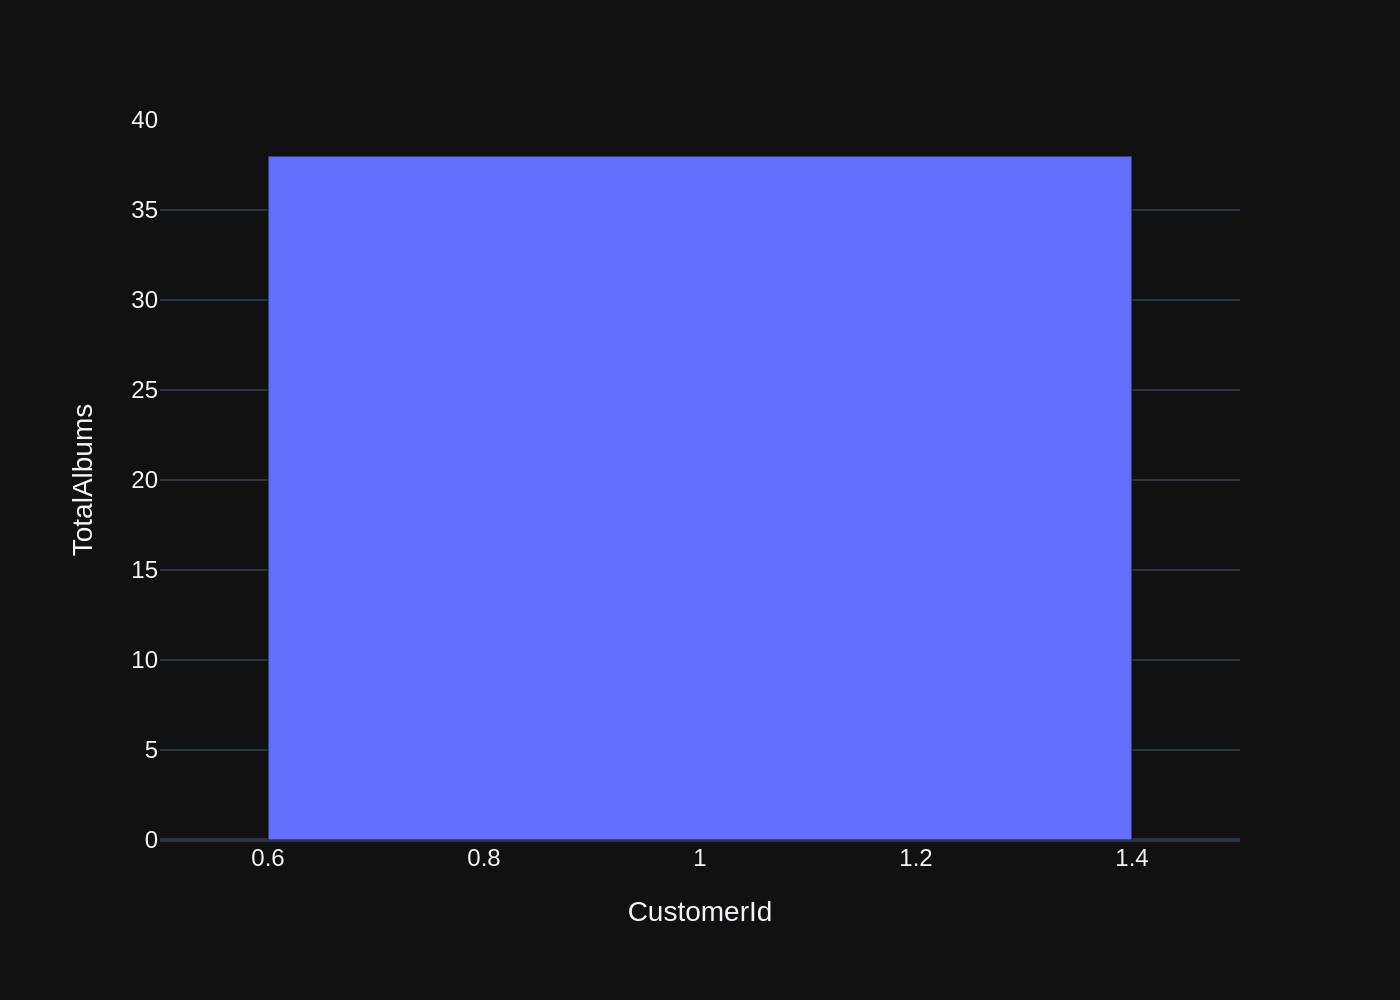





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, SUM(ii.Quantity) AS TotalAlbums
FROM Customers c
JOIN Invoices i ON c.CustomerId = i.CustomerId
JOIN Invoice_Items ii ON i.InvoiceId = ii.InvoiceId
JOIN Tracks t ON ii.TrackId = t.TrackId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalAlbums
0,1,38
1,2,38
2,3,38
3,4,38
4,5,38



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='CustomerId', y='TotalAlbums')

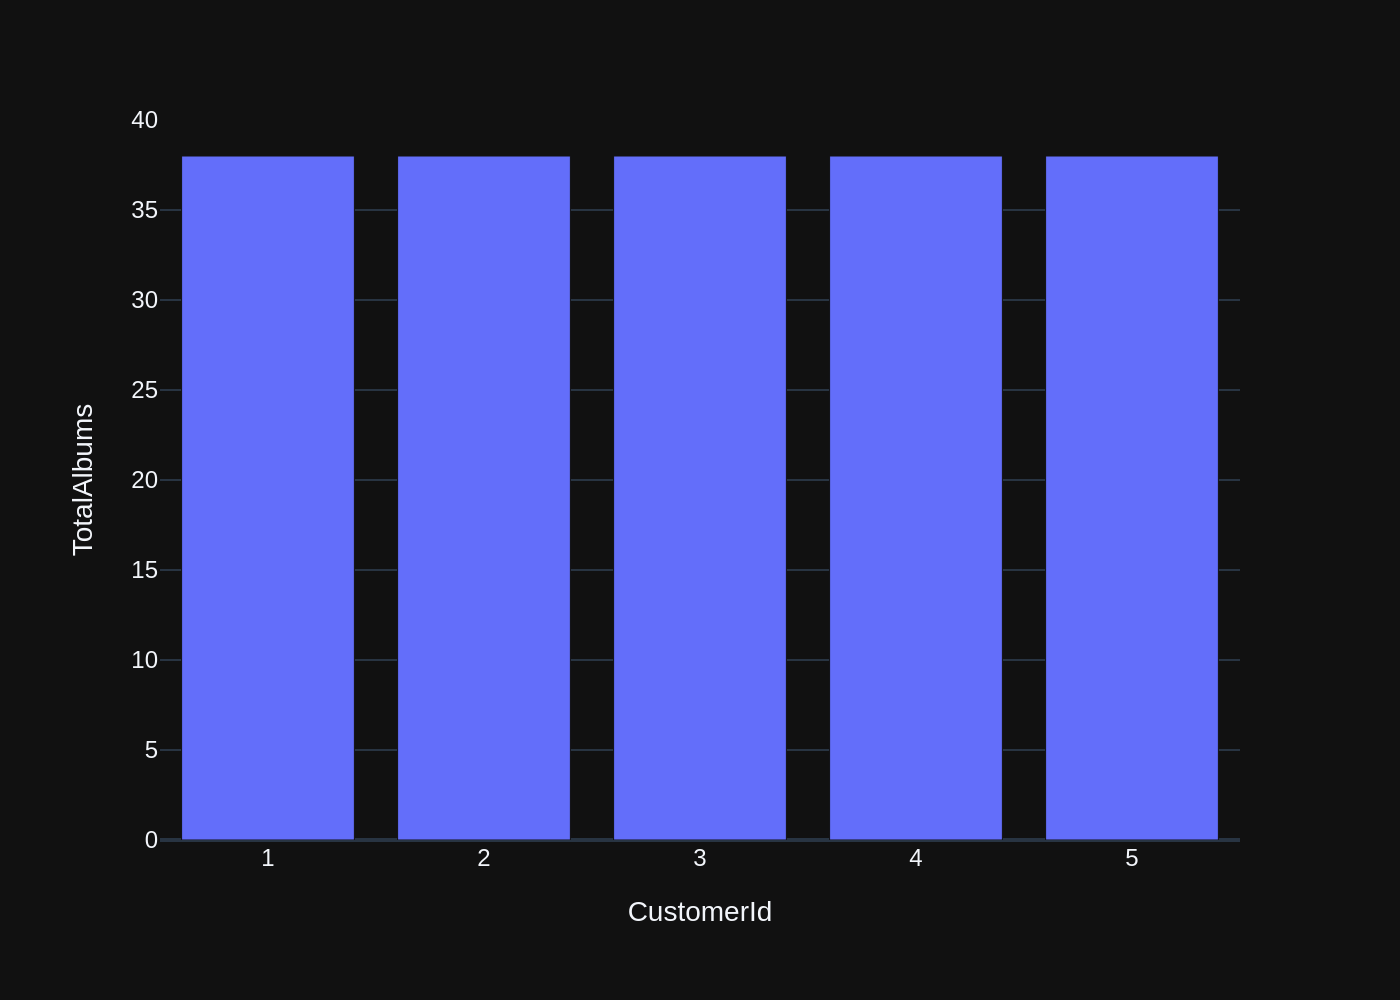





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, SUM(Total) AS TotalSpent FROM invoices GROUP BY CustomerId ORDER BY TotalSpent DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,CustomerId,TotalSpent
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='CustomerId', y='TotalSpent')

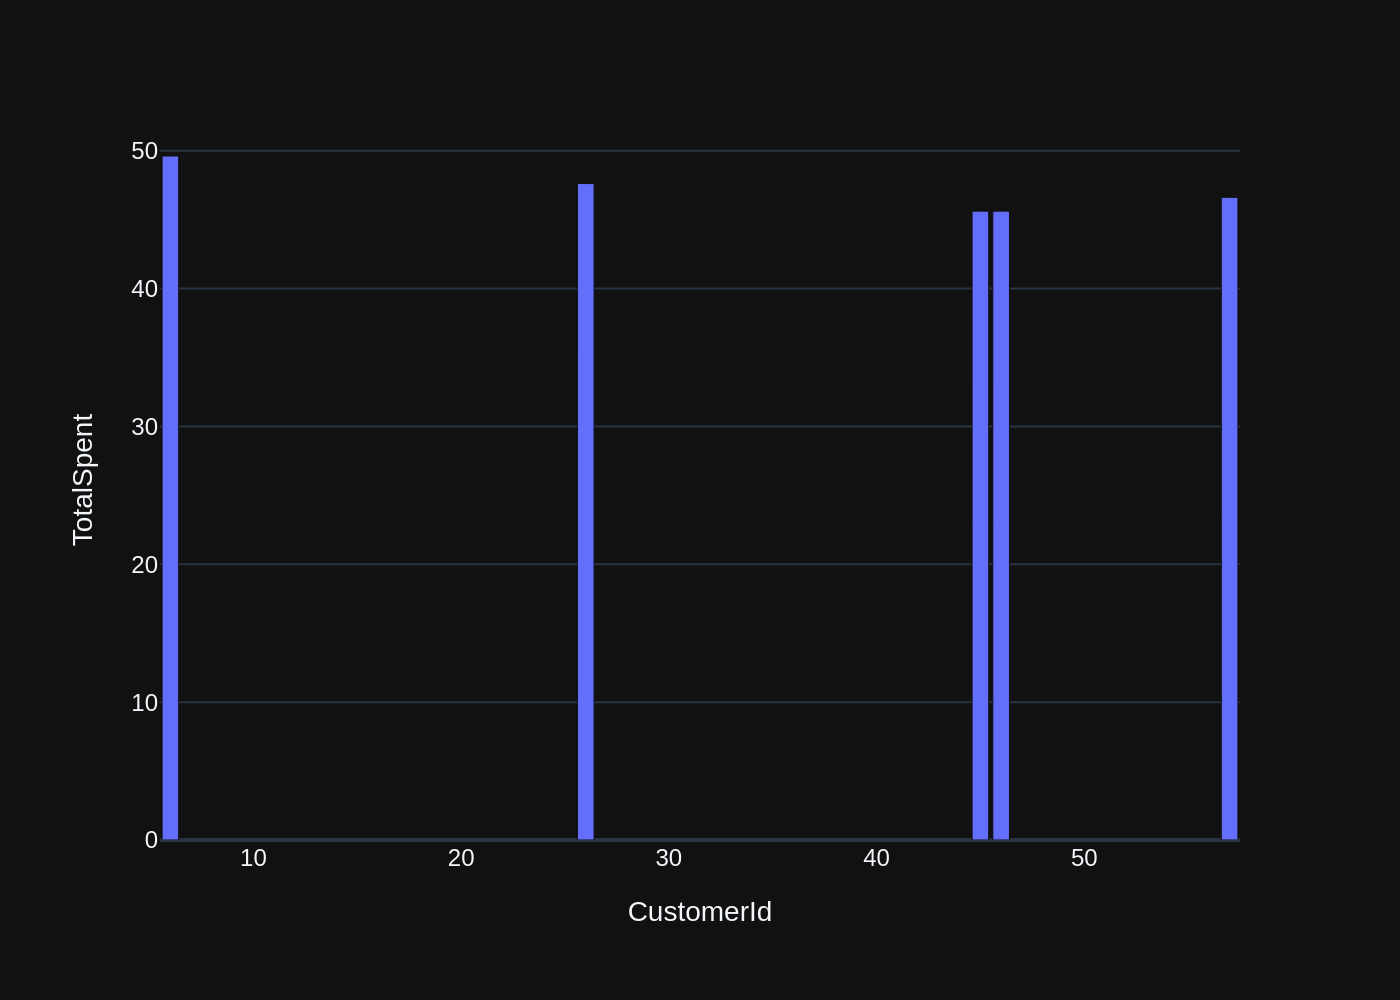





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT p.Name AS PlaylistName,
       COUNT(t.TrackId) AS TrackCount,
       SUM(t.Milliseconds) AS TotalDuration
FROM playlist_track pt
JOIN playlists p ON pt.PlaylistId = p.PlaylistId
JOIN tracks t ON pt.TrackId = t.TrackId
GROUP BY p.PlaylistId
HAVING TrackCount >= 10


[( <DataFrame> )]
queried dataframe



,PlaylistName,TrackCount,TotalDuration
0,Music,3290,877683083
1,TV Shows,213,501094957
2,90’s Music,1477,398705153
3,Music,3290,877683083
4,TV Shows,213,501094957
5,Brazilian Music,39,9486559
6,Classical,75,21770592
7,Classical 101 - Deep Cuts,25,6755730
8,Classical 101 - Next Steps,25,7575051
9,Classical 101 - The Basics,25,7439811



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='PlaylistName', y='TotalDuration', title='Total Duration of Tracks per Playlist')

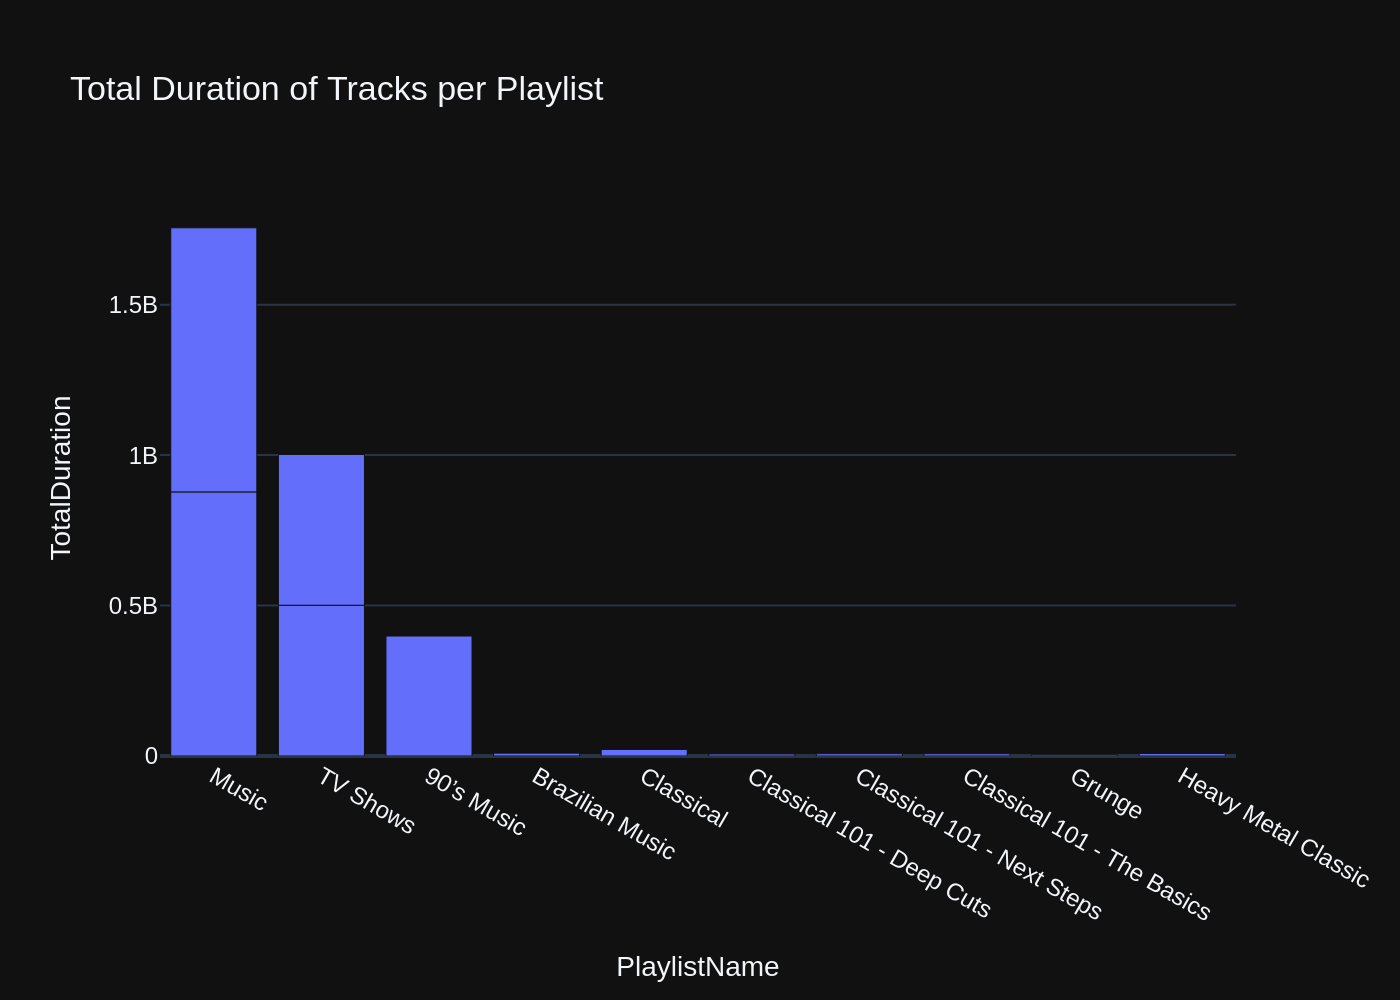





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 1 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 3 *****


Ollama parameters:
model=mistral-nemo:latest,
options={'gpu': True},
keep_alive=None



In [16]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [17]:
elapsed_time

275.65929770469666

In [18]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'mistral-nemo' 
 took 276 sec
 run on 'ducklover1' 
 at 20241121-235025


In [19]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-mistral-nemo-276s-ducklover1-20241121-235025.csv'

### Save training data

In [20]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,011ce0ff-6ba6-5776-8d1f-c9738ebd5a0d-sql,\n Generating SQL for this ...,"SELECT c.CustomerId, COUNT(ii.InvoiceLineId) A...",sql
1,13a5348e-d5a8-55ac-a982-e406f8612346-sql,List all employees and their reporting manager...,SELECT\n e.FirstName || ' ' || e.LastName A...,sql
2,149754a0-aae5-526d-a24f-aa41a6f95d75-sql,which table stores customer's orders,SELECT name FROM sqlite_master WHERE type='tab...,sql
3,198be005-3d10-5b95-8e39-9a73ae76e6bc-sql,List all invoices with a total exceeding $10,SELECT * FROM invoices WHERE Total > 10 LIMIT 20,sql
4,205bf964-6182-5574-a8b5-3593a0819060-sql,Get the total number of invoices for each cust...,"SELECT CustomerId, COUNT(InvoiceId) AS TotalIn...",sql
5,256eeef7-aff7-59e7-bb8a-f2c361c407cf-sql,\n Find the top 5 customers who spen...,"SELECT CustomerId, SUM(Total) AS TotalSpent FR...",sql
6,3c1d40d7-99f3-599c-b694-93c30a74bddc-sql,"Find all tracks with a name containing ""What"" ...",SELECT * FROM tracks WHERE lower(Name) LIKE '%...,sql
7,5e22f1a8-263e-5e39-a6c7-c9e07c831a7e-sql,Find the top 5 most expensive tracks (based on...,"SELECT TrackId, Name, UnitPrice FROM tracks OR...",sql
8,5e526ae4-4473-5cc5-9185-b16c465687c0-sql,How many customers are there,SELECT COUNT(*) FROM customers LIMIT 20,sql
9,802db2ef-d2c7-5c61-9460-bd29c0714846-sql,Get the average invoice total for each customer:,"SELECT\n CustomerId,\n AVG(Total) AS Avg...",sql


In [21]:
df_training_data.to_csv(file_csv, index=False)